<a href="https://colab.research.google.com/github/SundaramSinghPundir/Traffic_Sign_Classifier/blob/main/Traffic_Sign_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
data_dir = "/content/drive/MyDrive/Colab/TSR"
os.chdir(data_dir)
train_path = 'Train'
test_path = 'Test'

IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [ ]:
classes = {0:'Speed limit (20km/h)',
           1:'Speed limit (30km/h)',
           2:'Speed limit (50km/h)',
           3:'Speed limit (60km/h)',
           4:'Speed limit (70km/h)',
           5:'Speed limit (80km/h)',
           6:'End of speed limit (80km/h)',
           7:'Speed limit (100km/h)',
           8:'Speed limit (120km/h)',
           9:'No passing',
           10:'No passing veh over 3.5 tons',
           11:'Right-of-way at intersection',
           12:'Priority road',
           13:'Yield',
           14:'Stop',
           15:'No vehicles',
           16:'Veh > 3.5 tons prohibited',
           17:'No entry',
           18:'General caution',
           19:'Dangerous curve left',
           20:'Dangerous curve right',
           21:'Double curve',
           22:'Bumpy road',
           23:'Slippery road',
           24:'Road narrows on the right',
           25:'Road work',
           26:'Traffic signals',
           27:'Pedestrains',
           28:'Children crossing',
           29:'Bicycles crossing',
           30:'Beware of ice/snow',
           31:'Wild animals crossing',
           32:'End speed + passing limits',
           33:'Turn right ahead',
           34:'Turn left ahead',
           35:'Ahead only',
           36:'Go straight or right',
           37:'Go straight or left',
           38:'Keep right',
           39:'Keep left',
           40:'Roundabout mandatory',
           41:'End of no passing',
           42:'End no passing veh > 3.5 tons'}

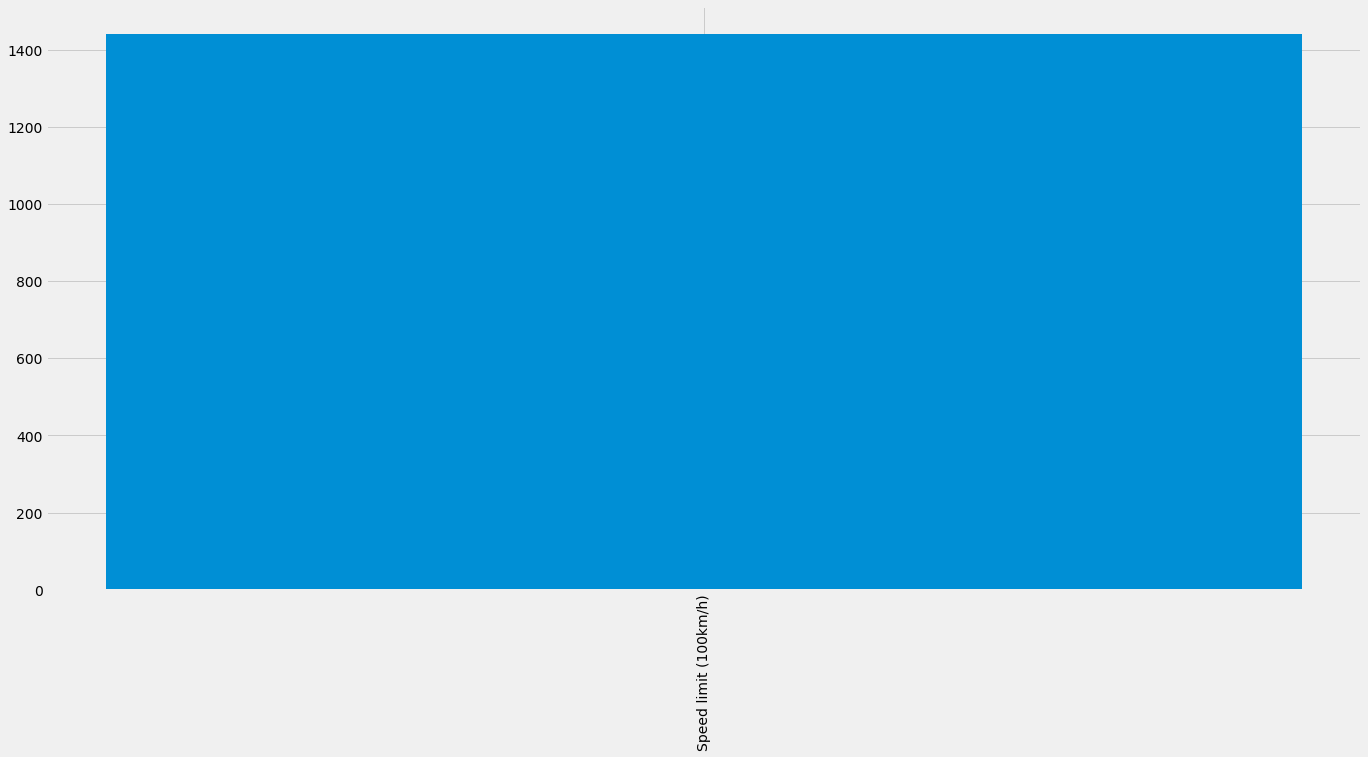

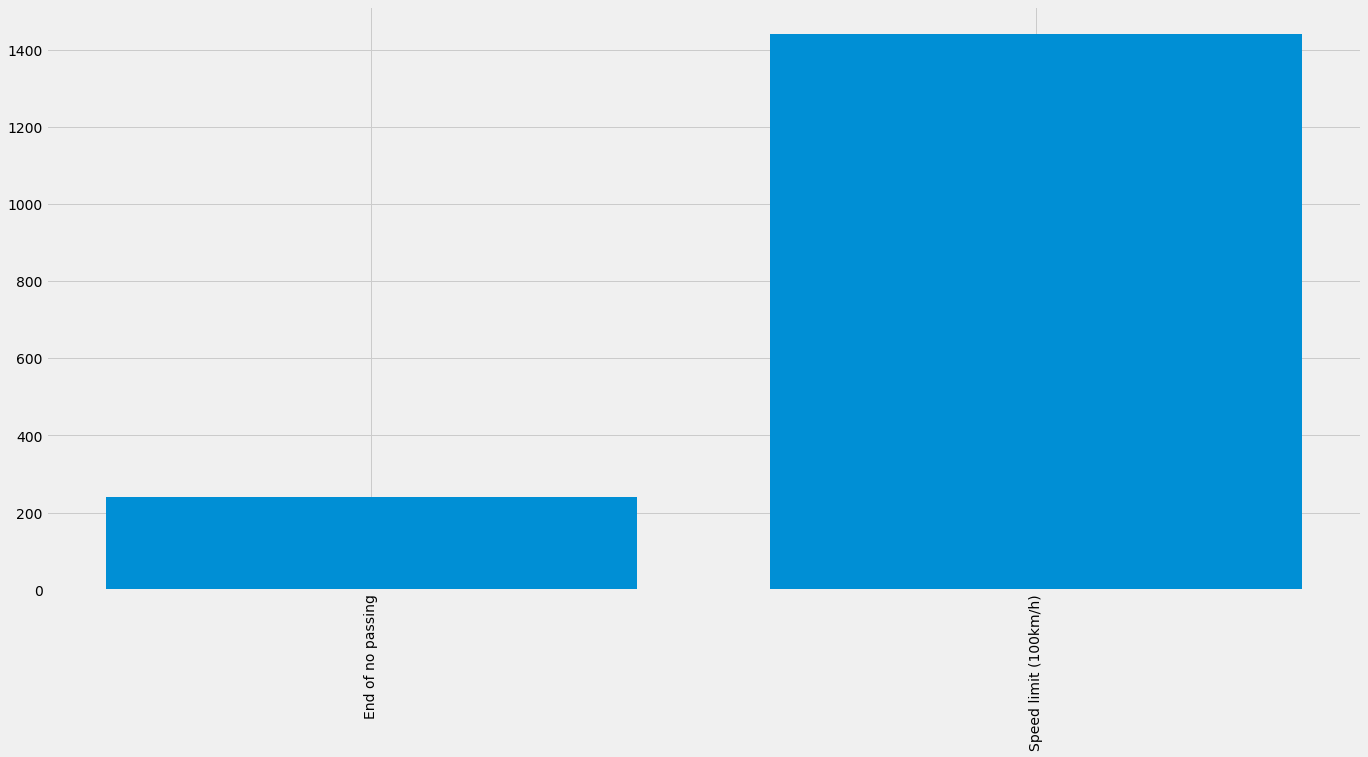

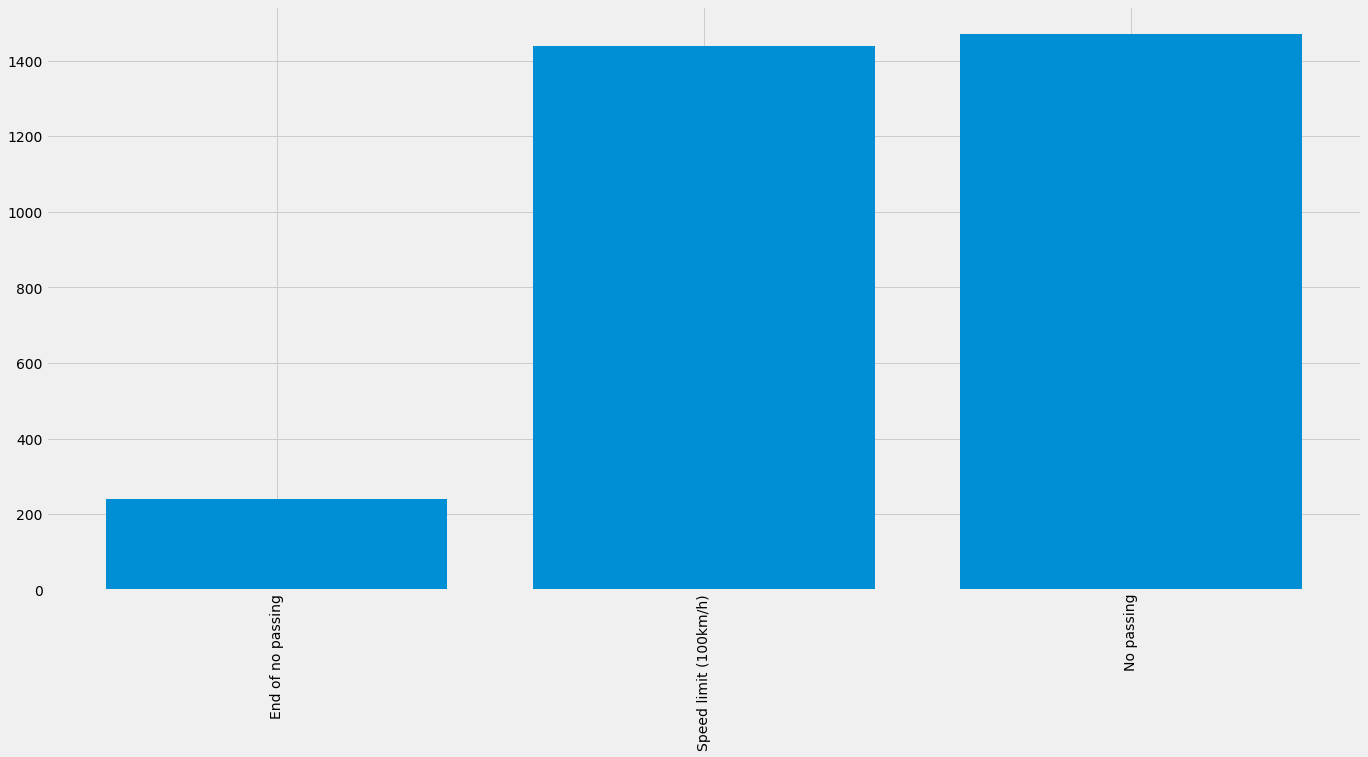

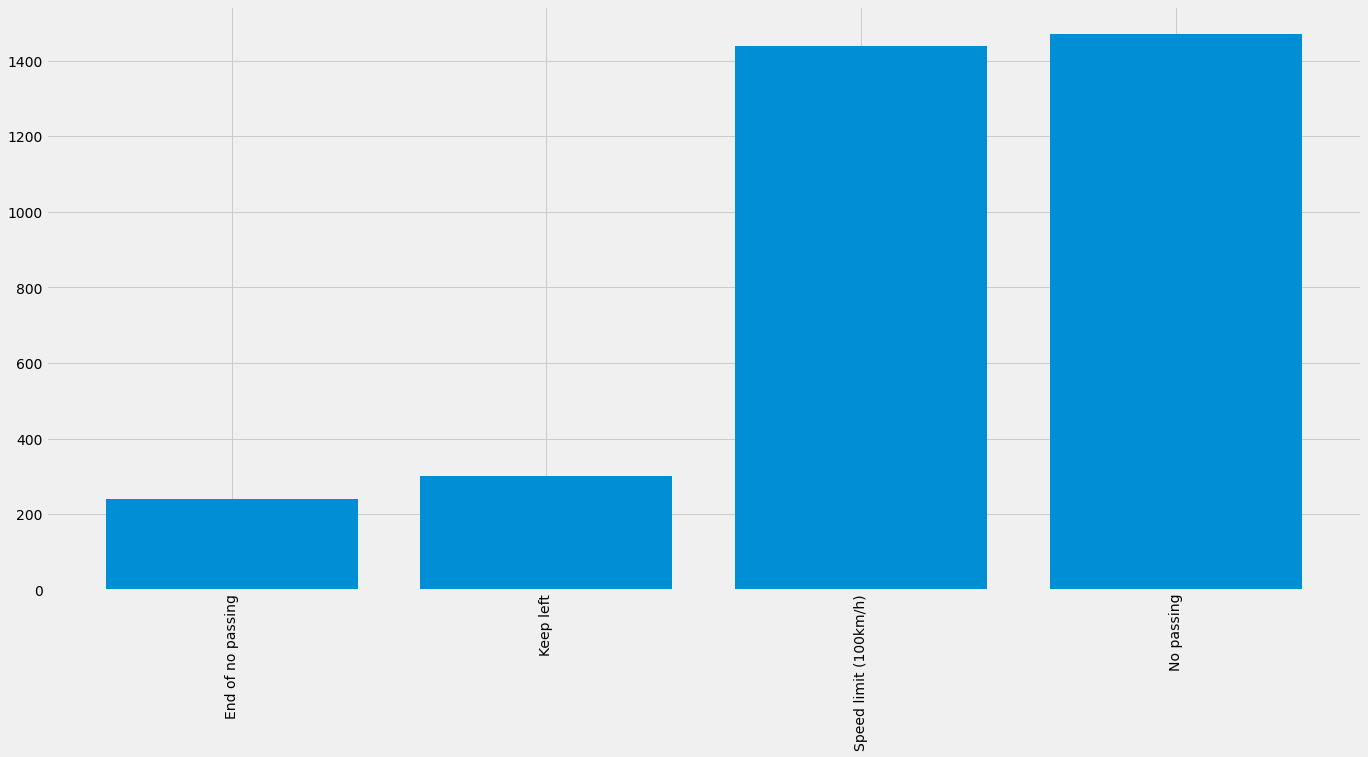

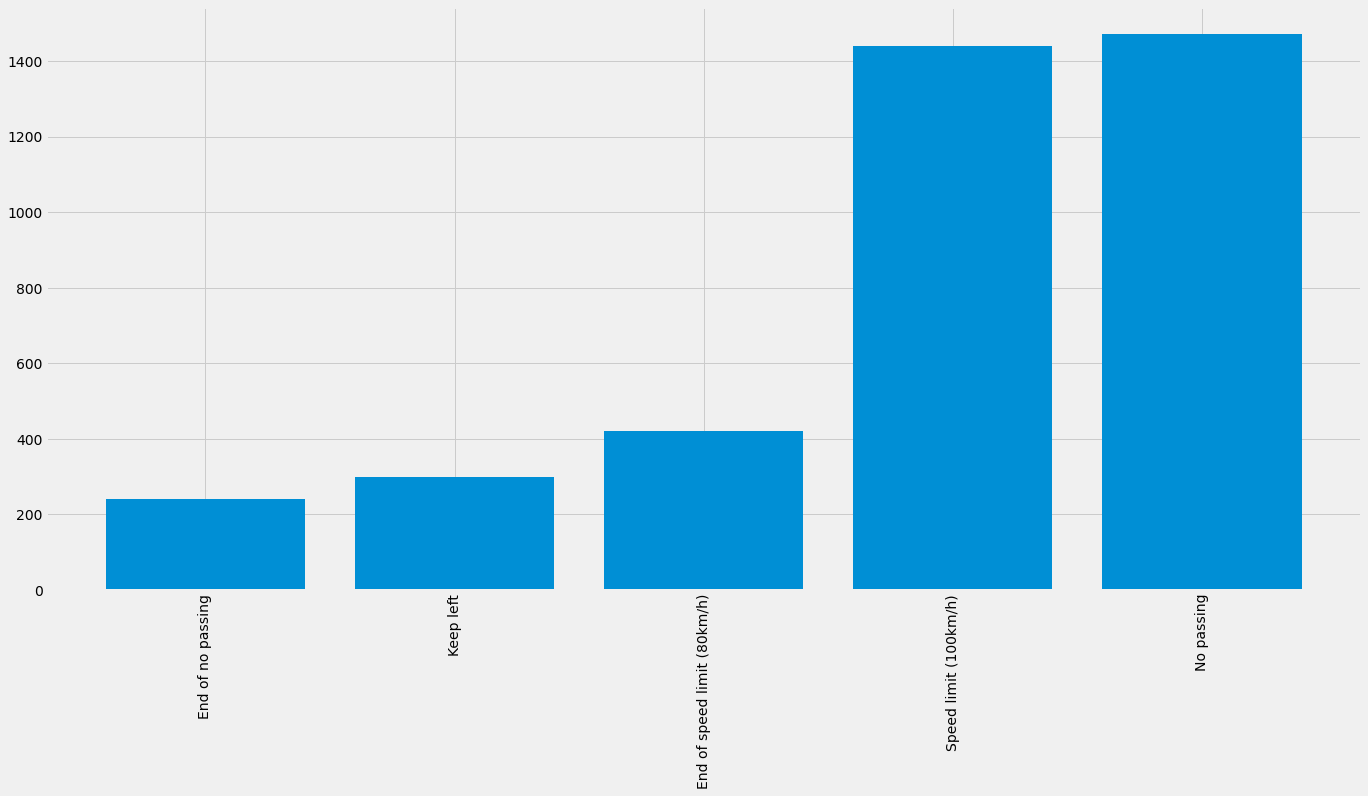

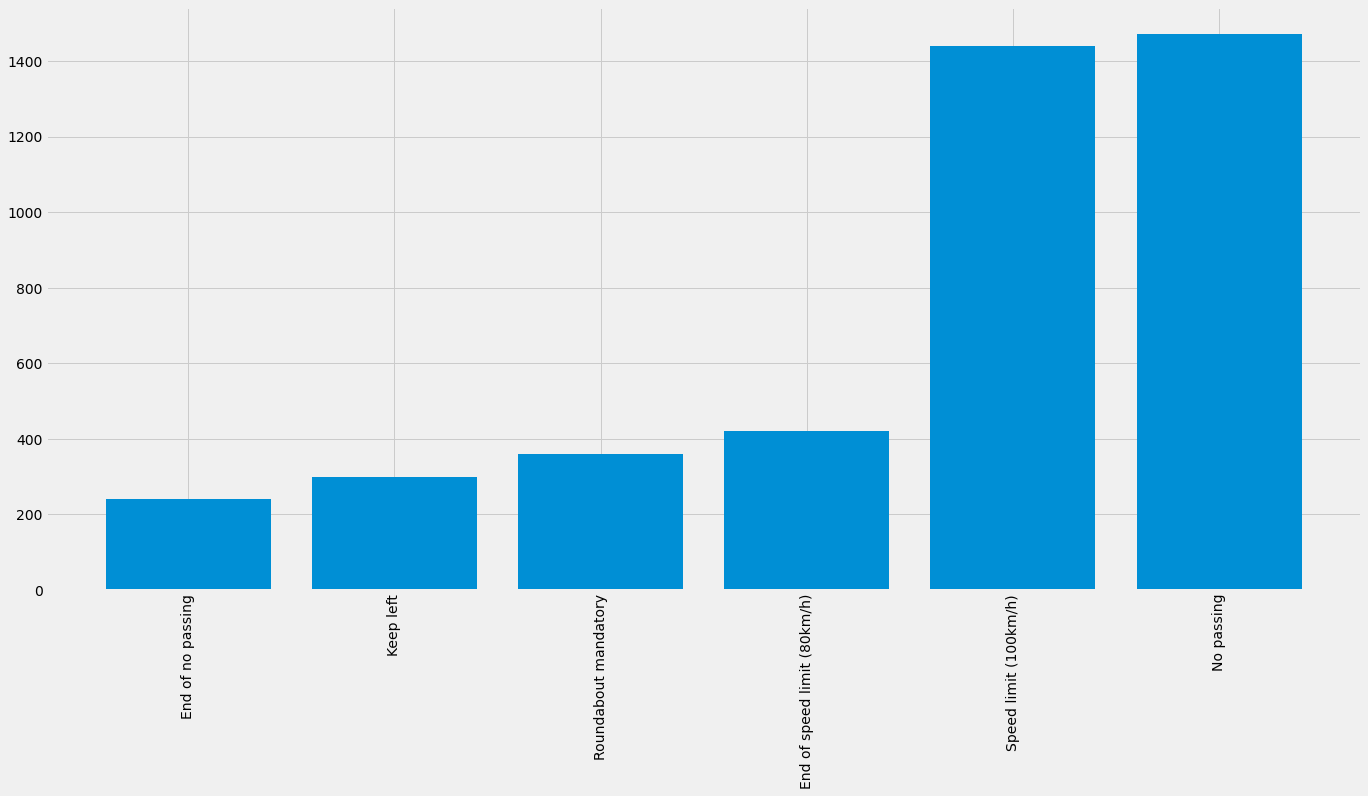

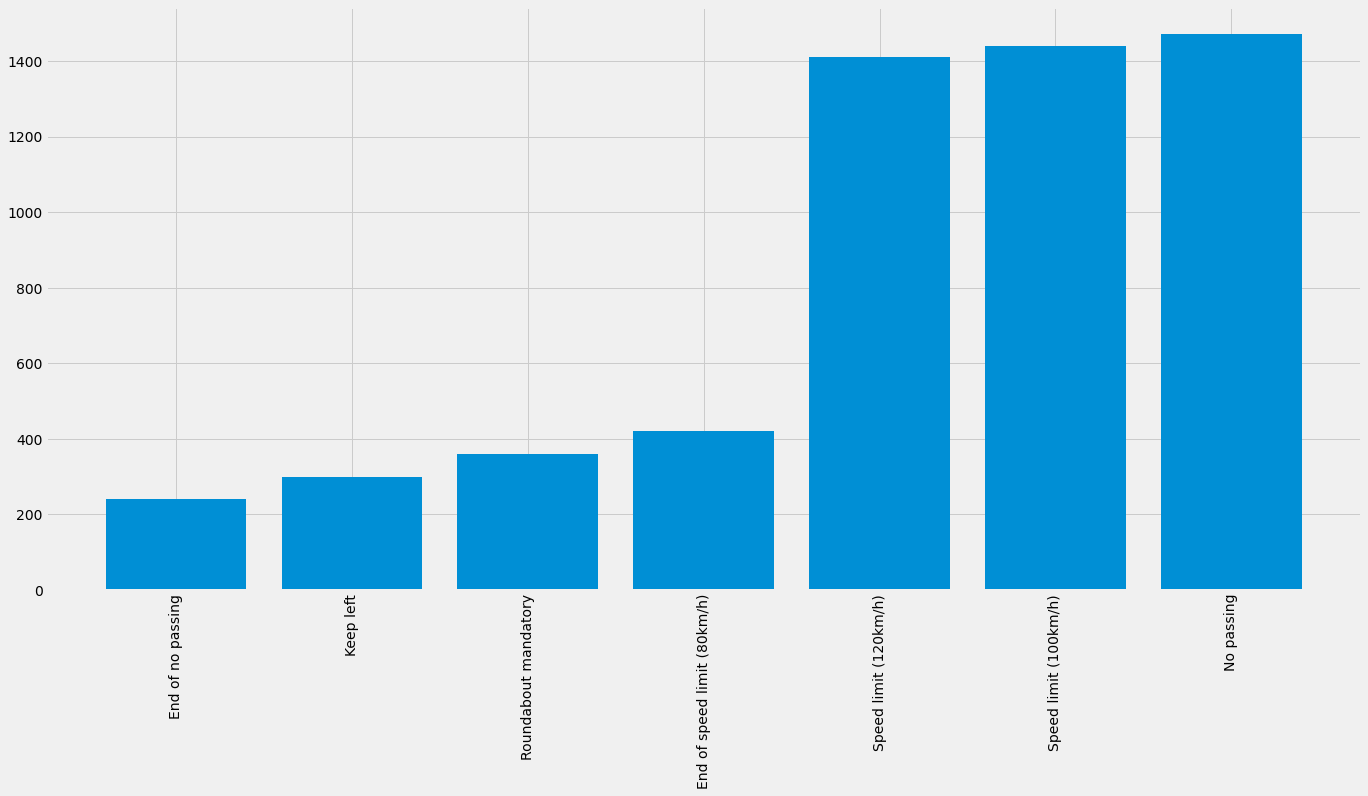

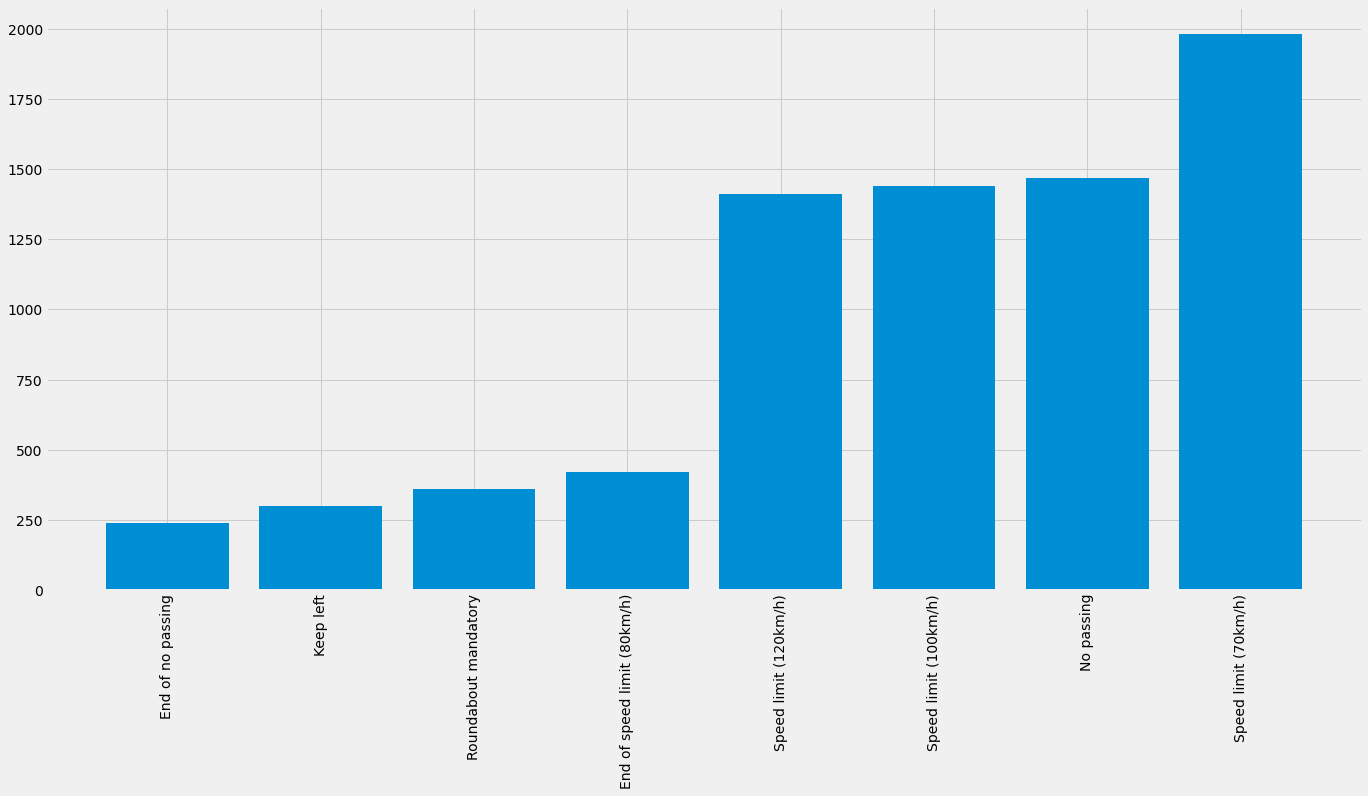

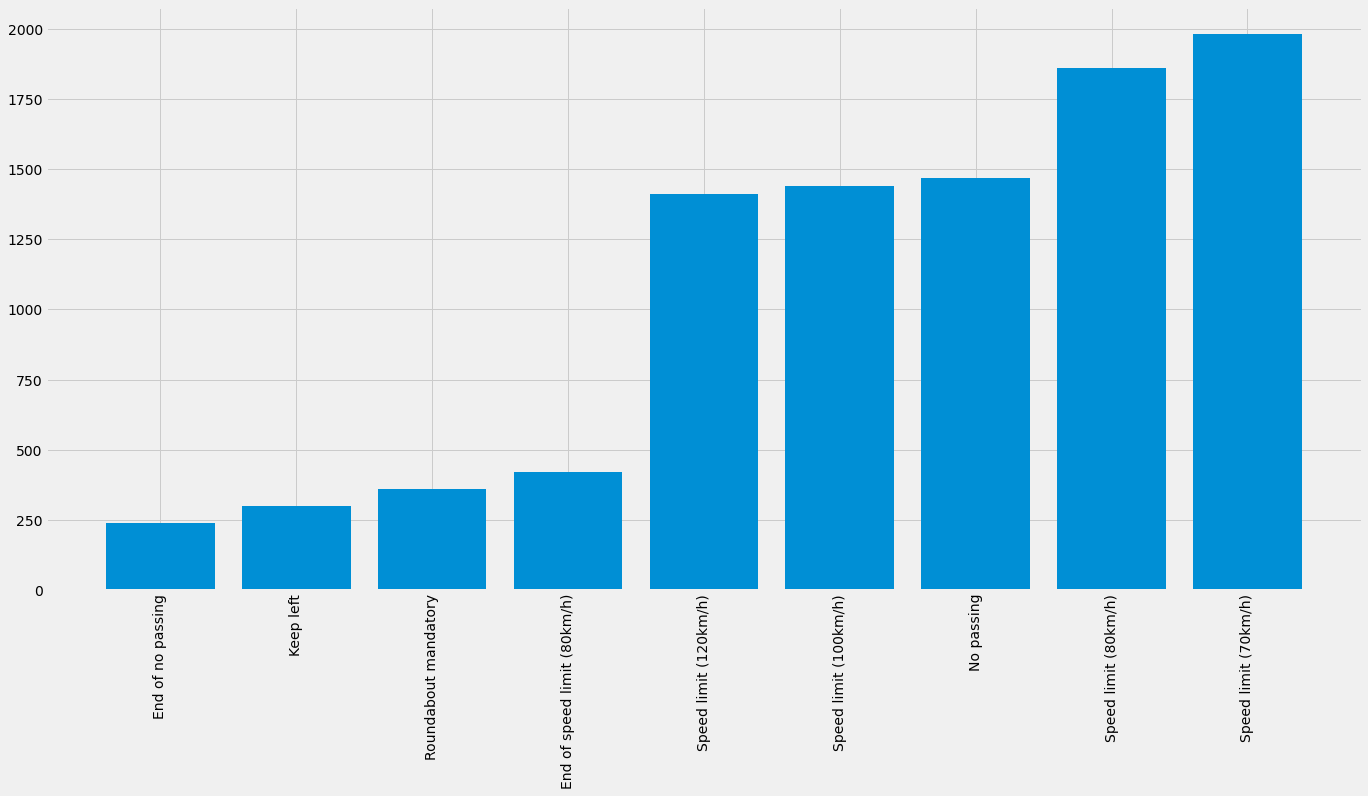

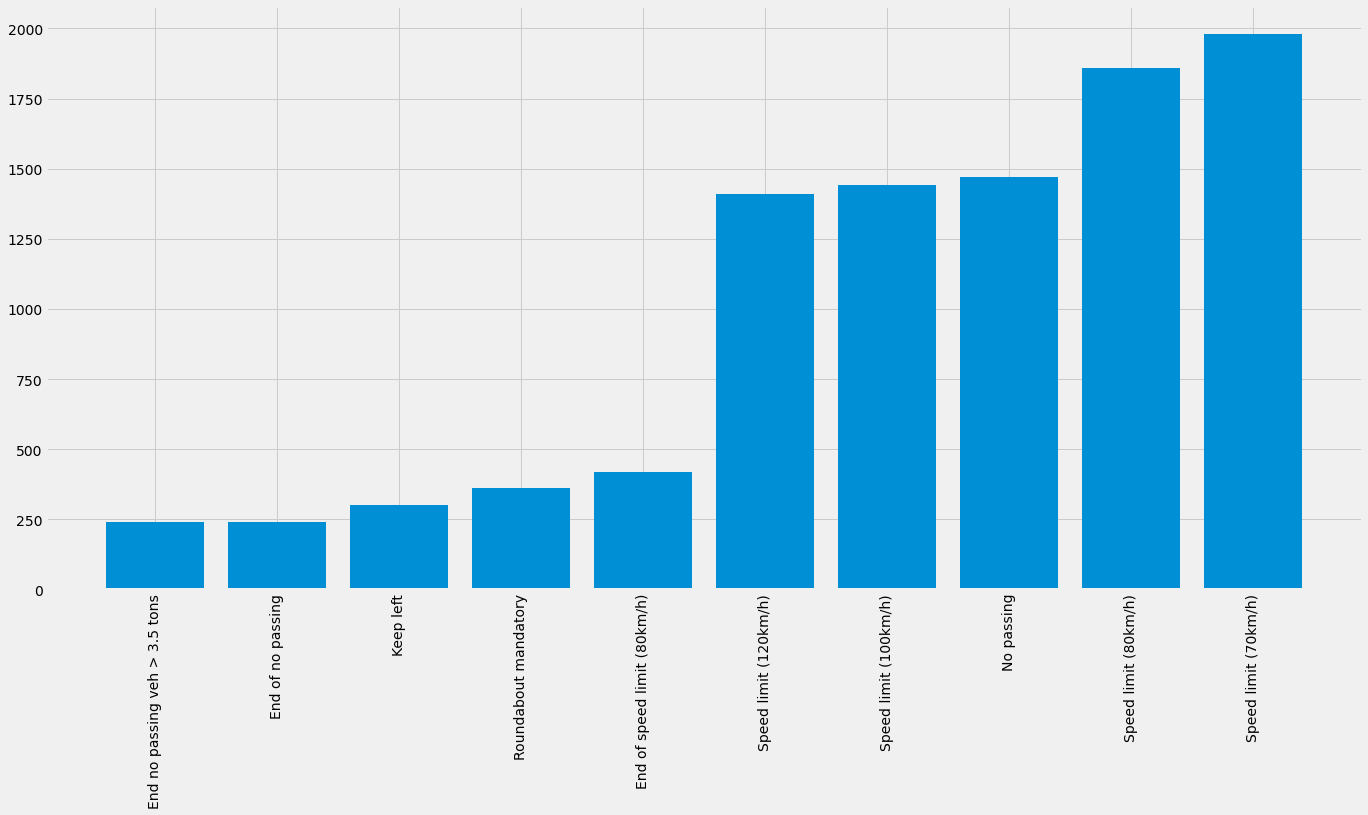

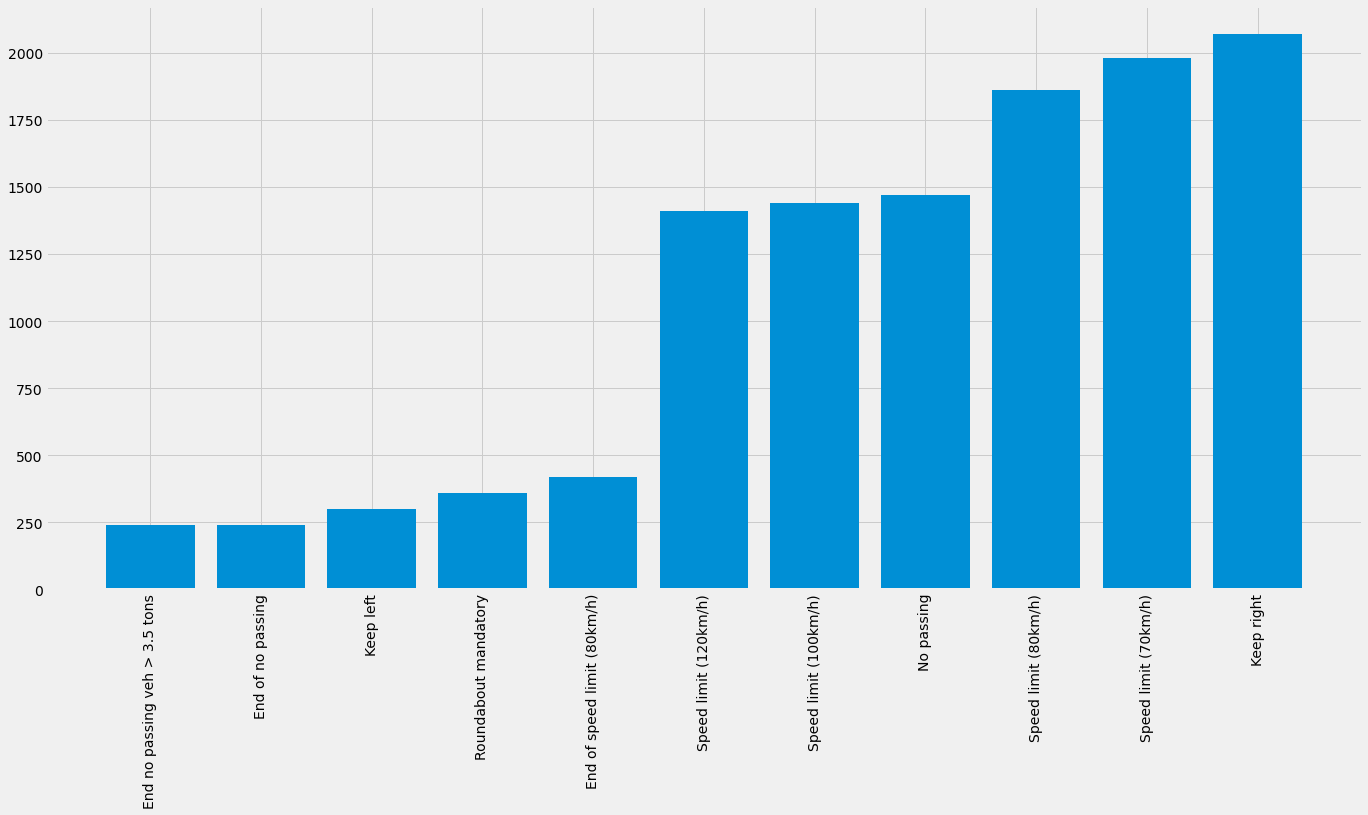

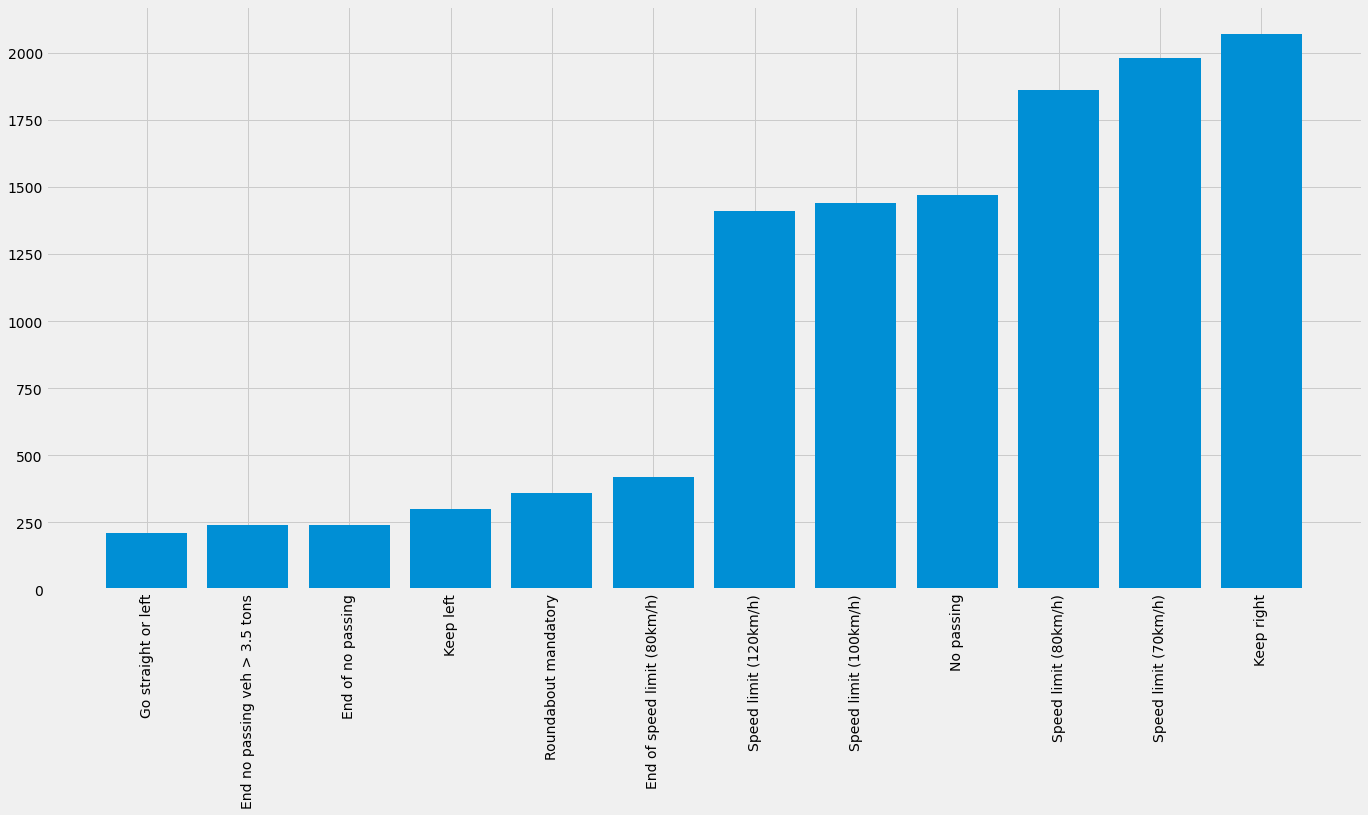

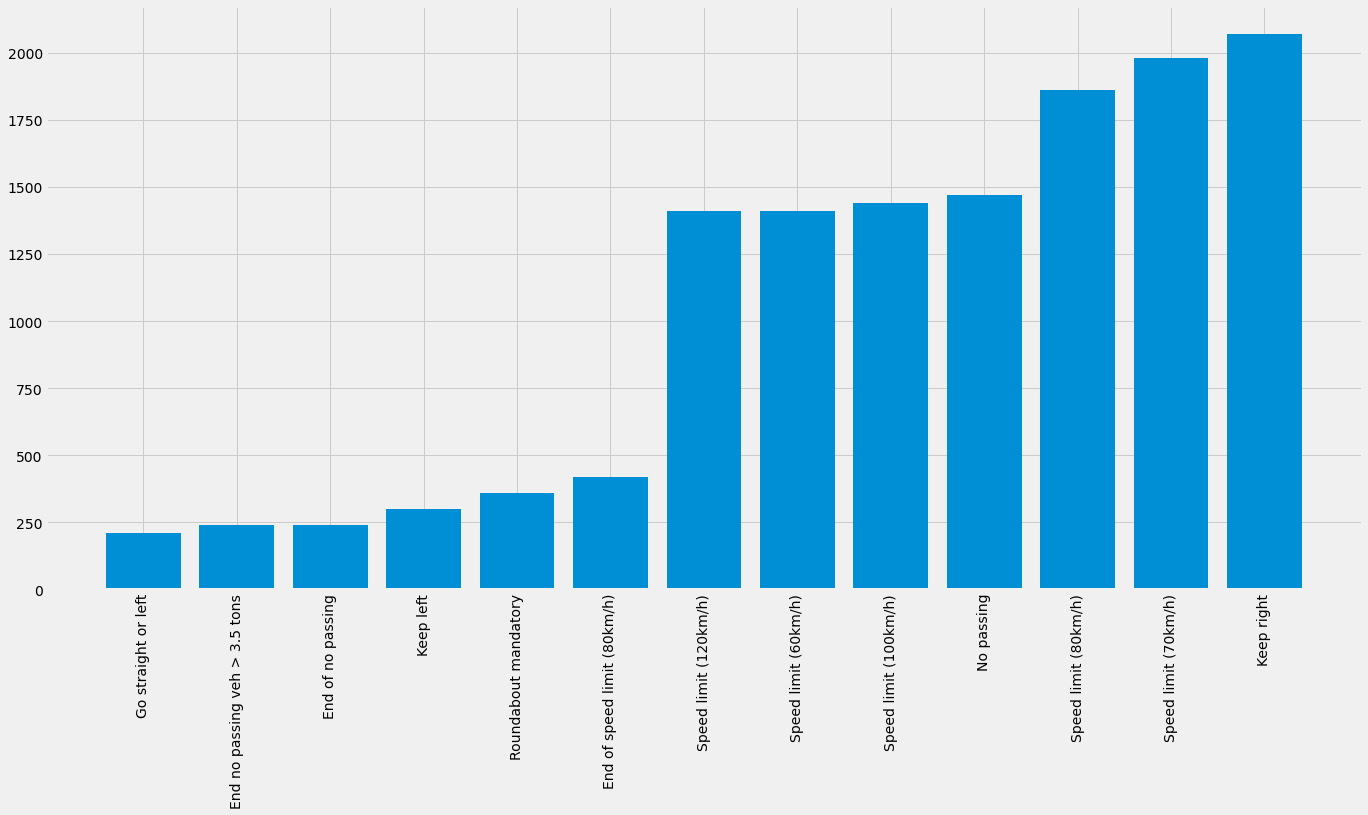

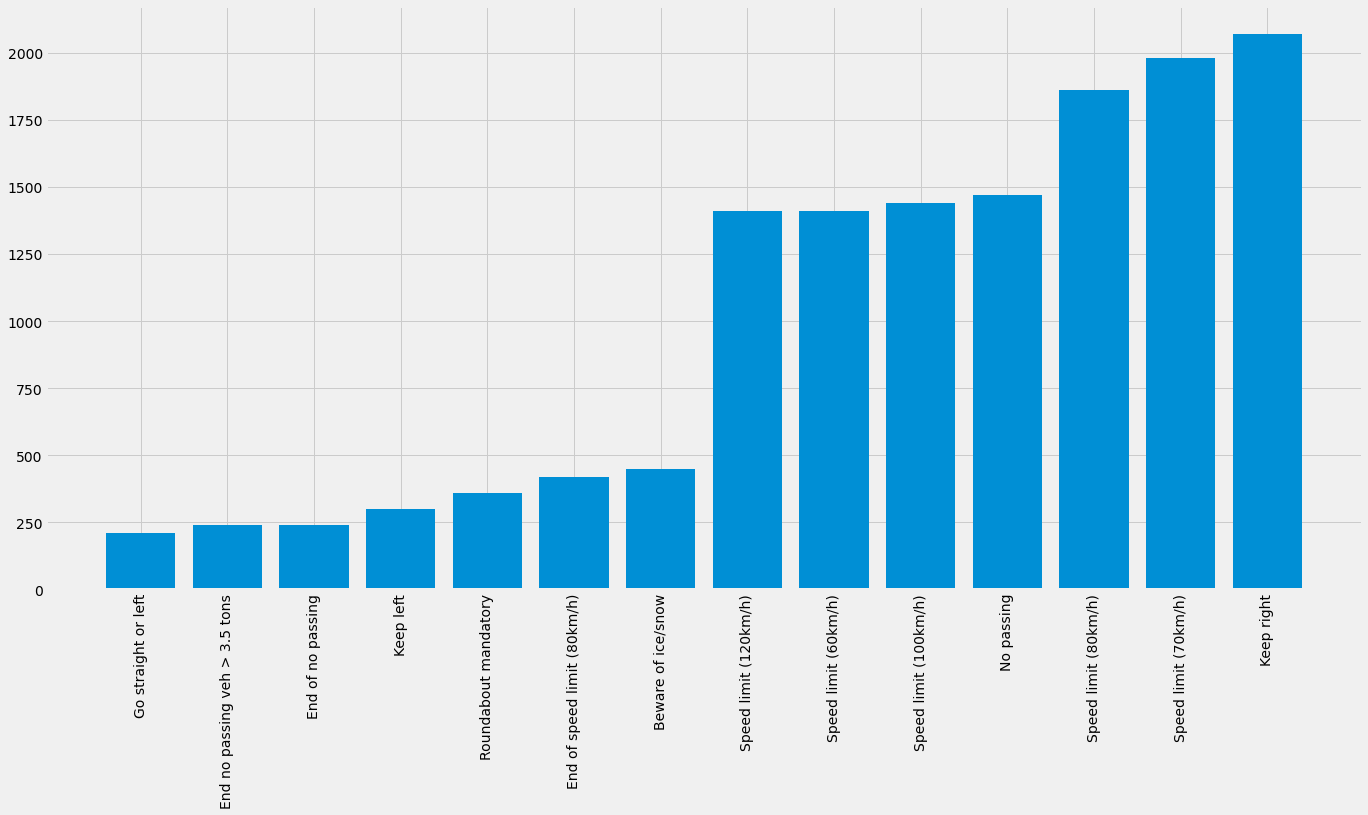

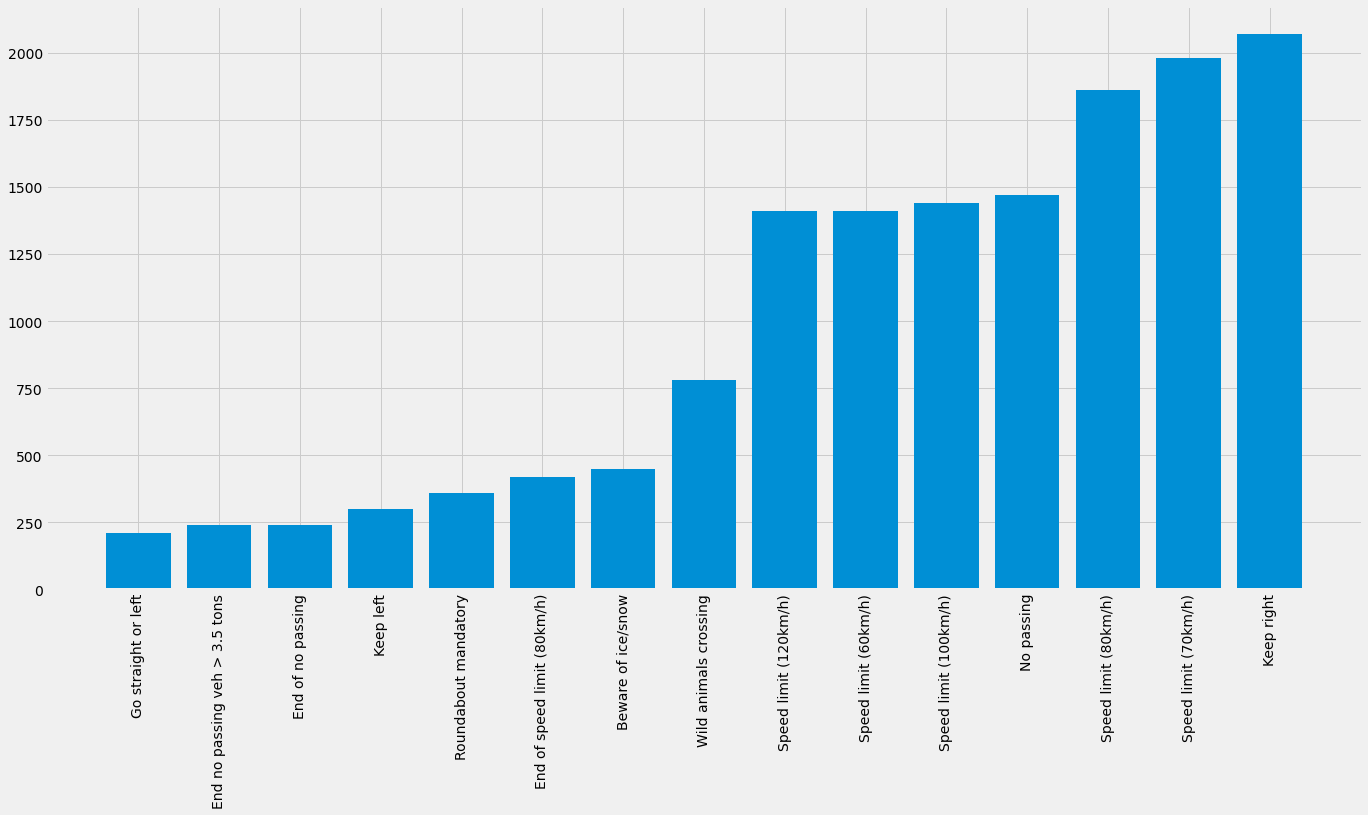

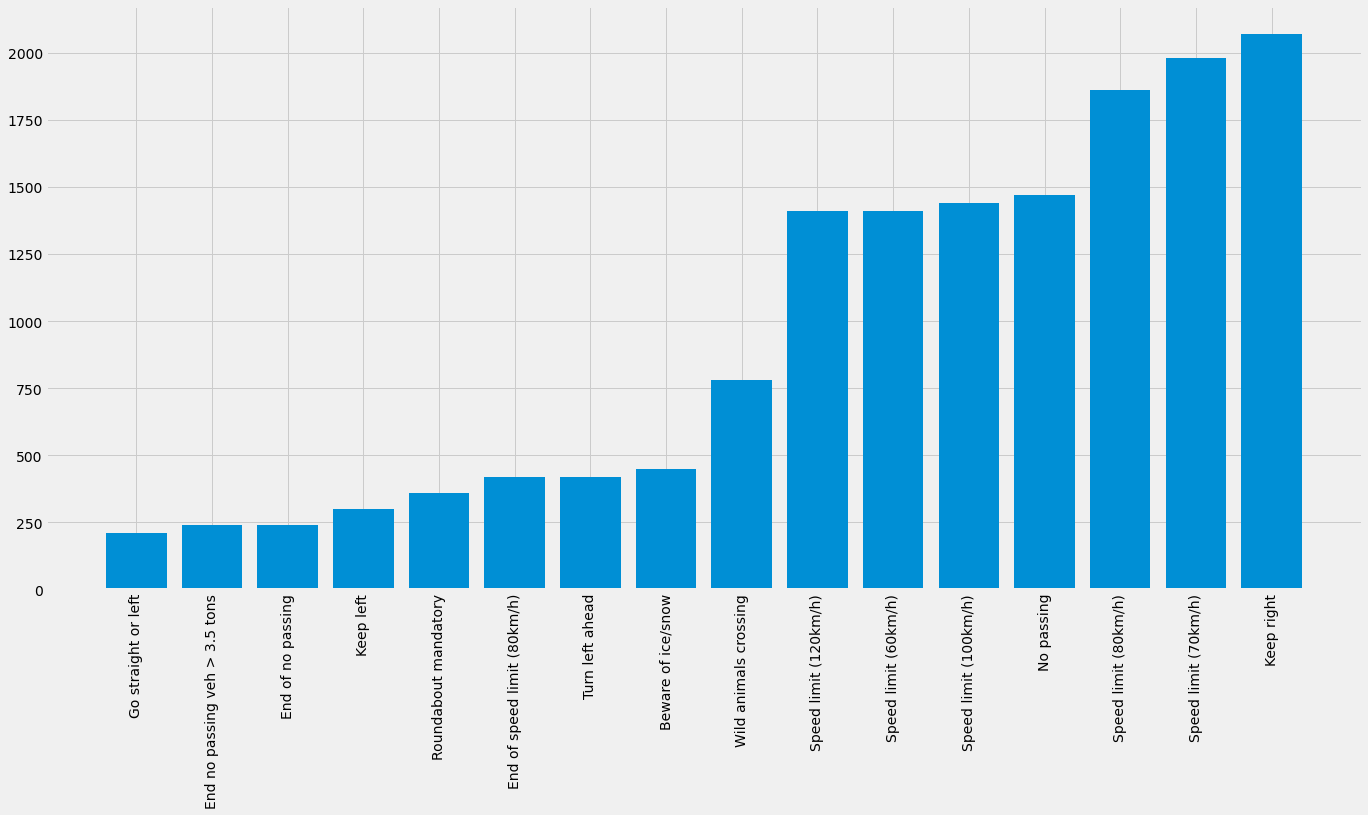

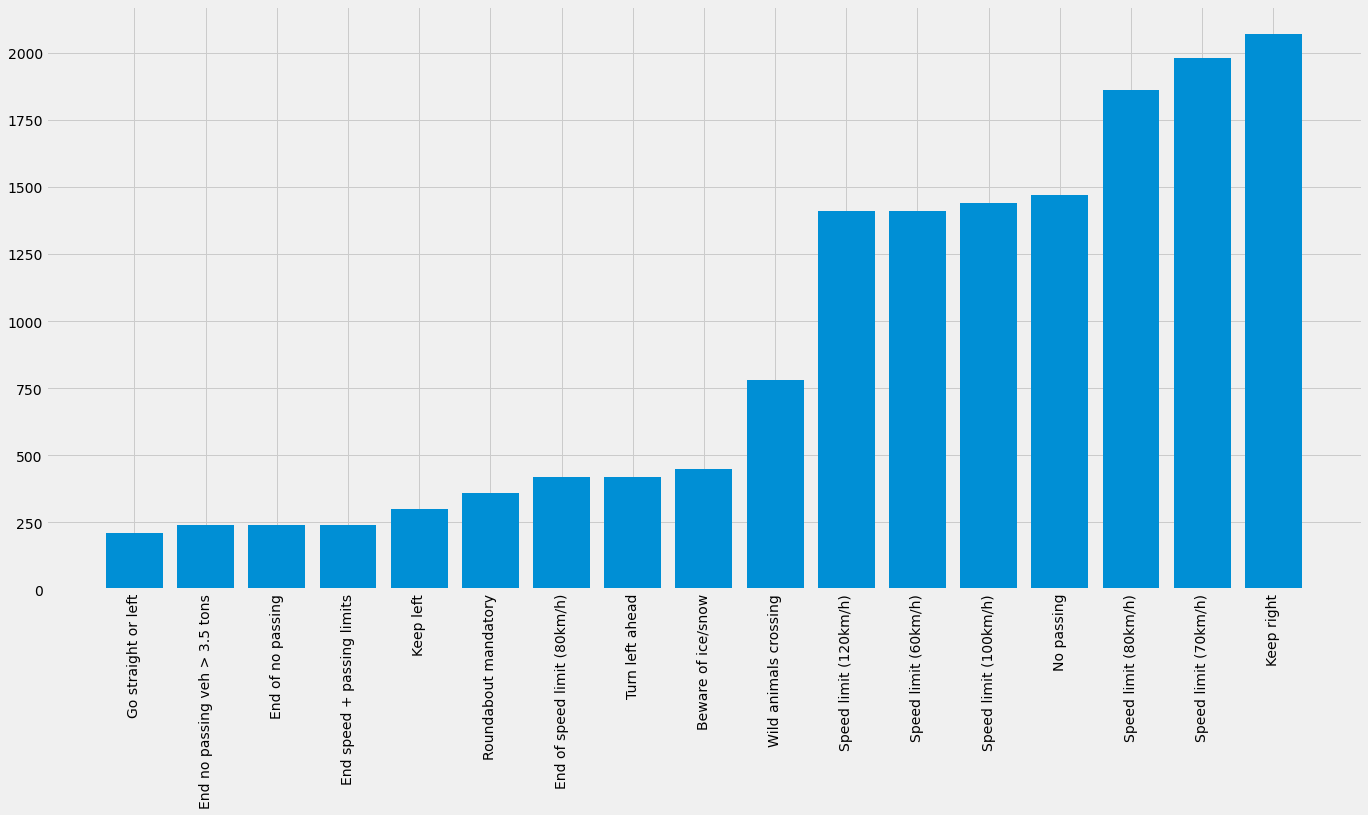

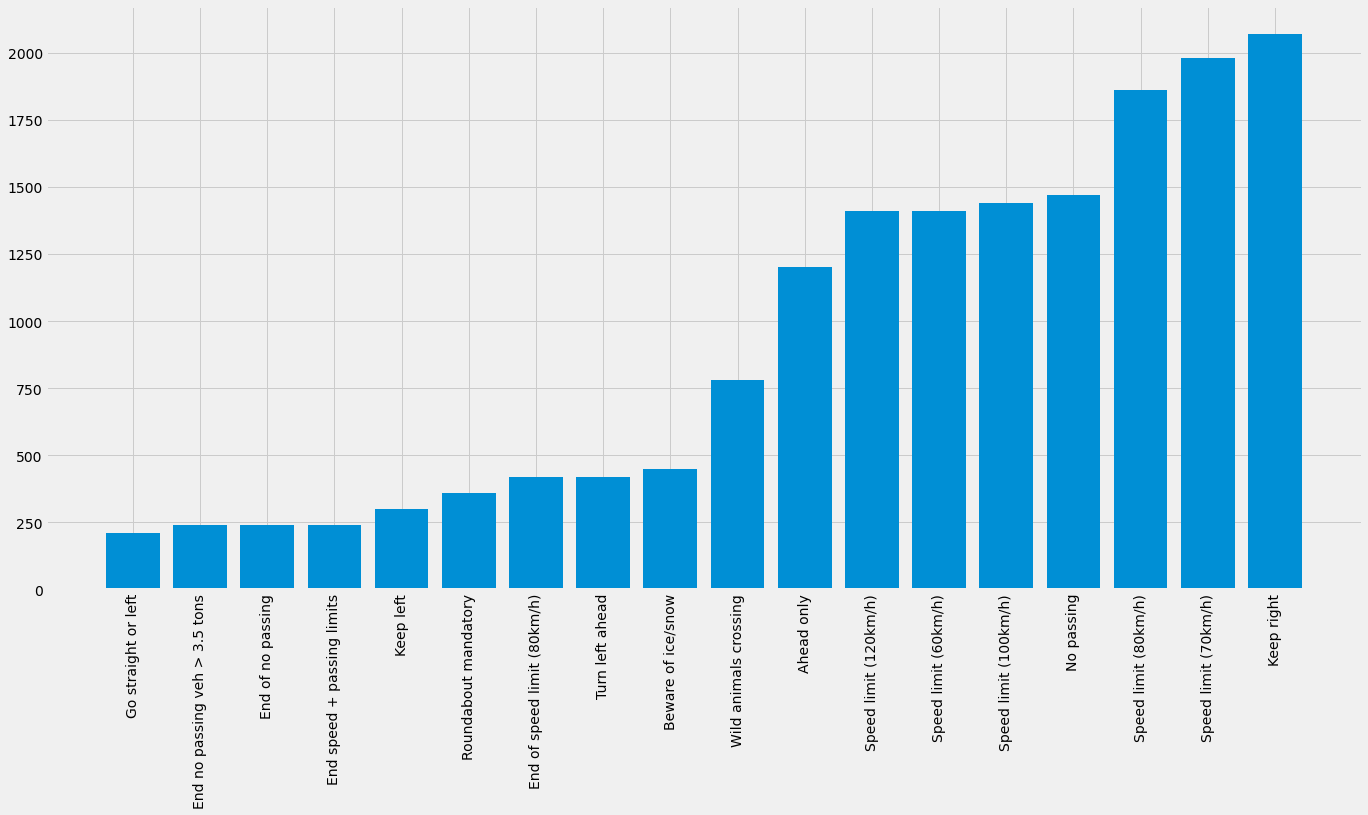

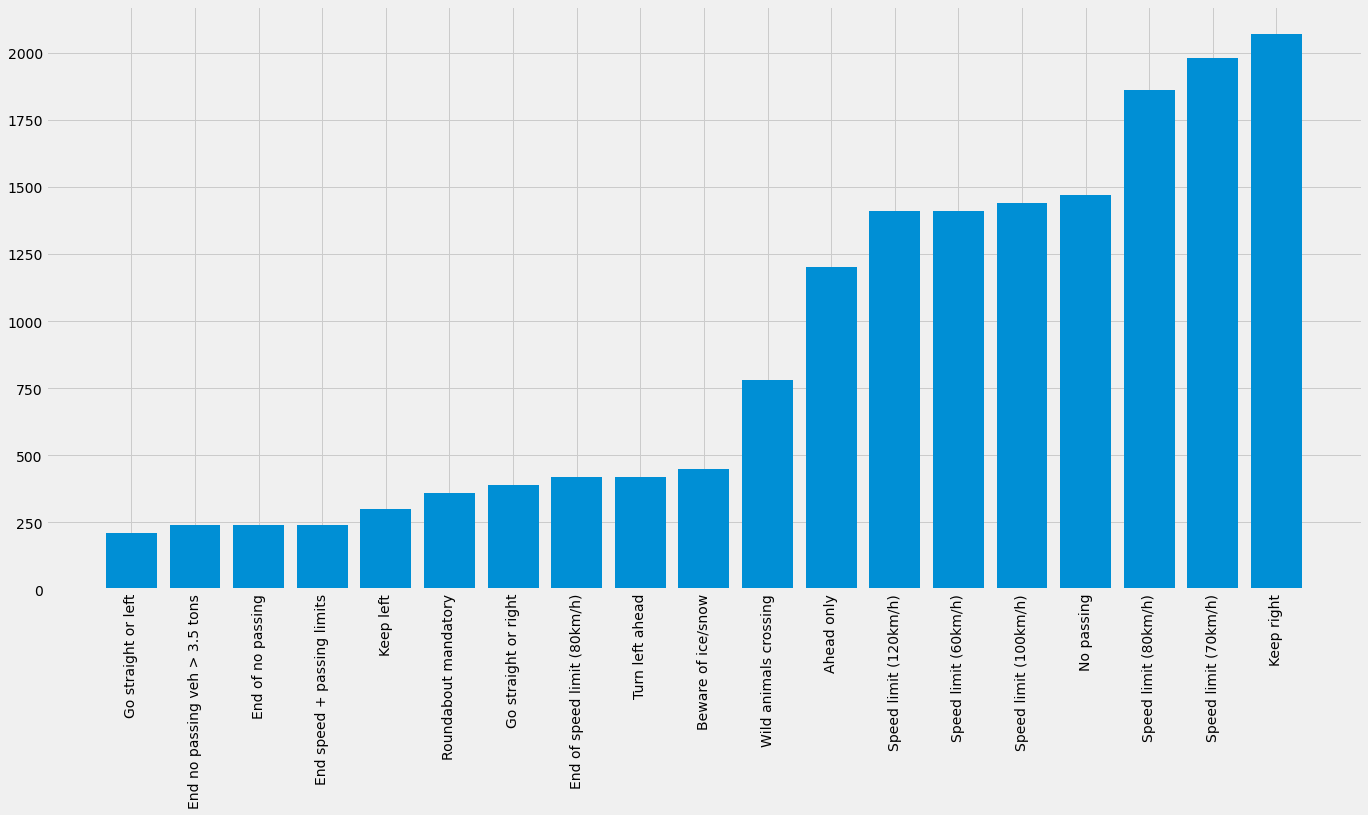

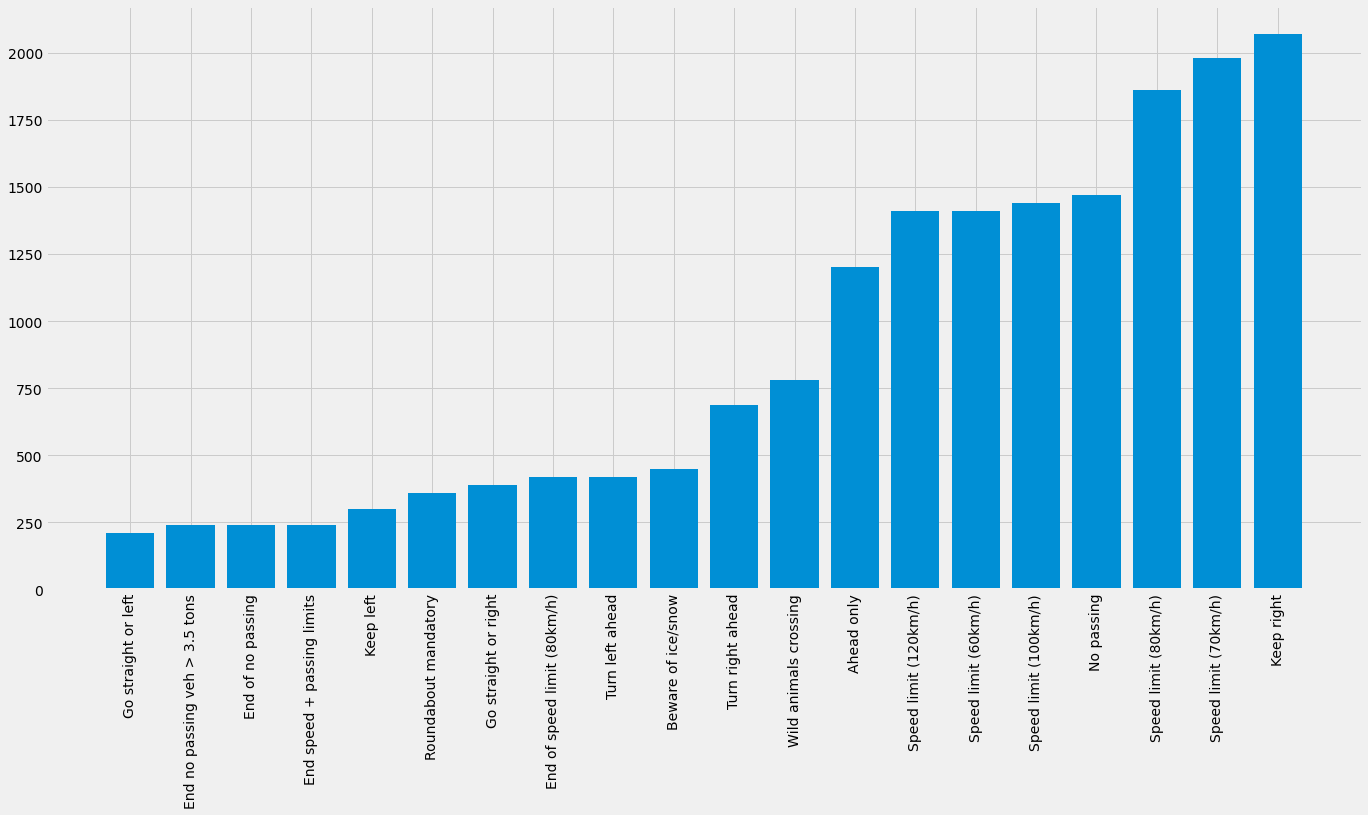

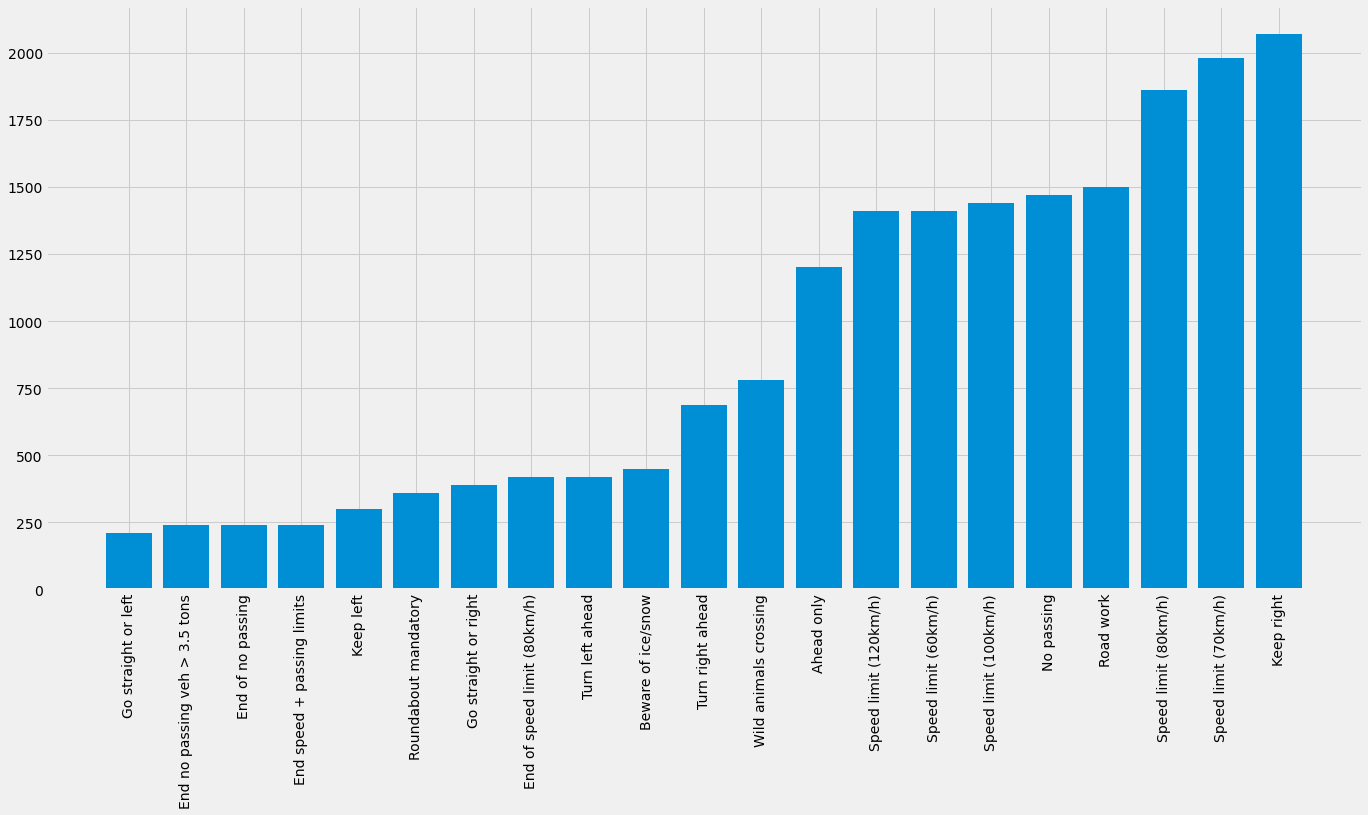

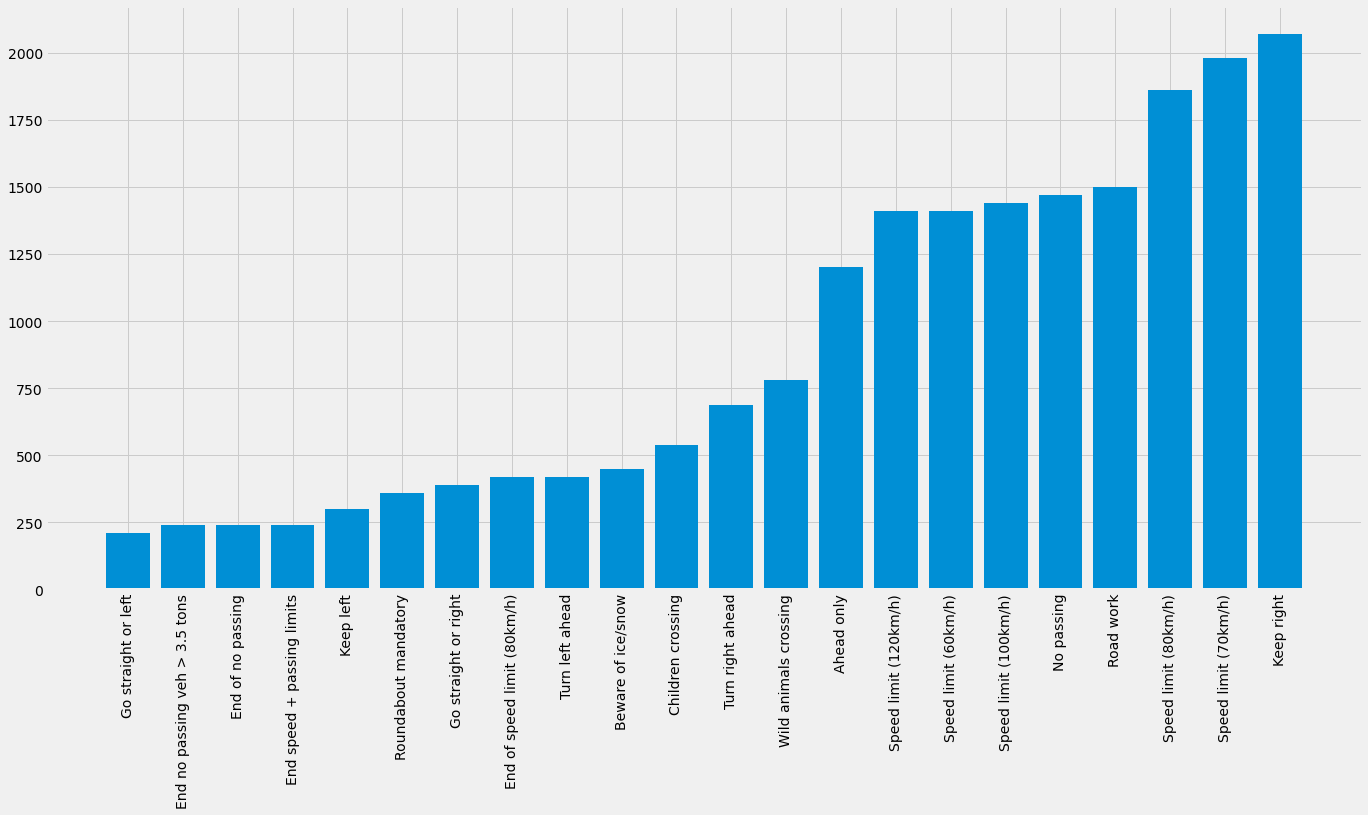

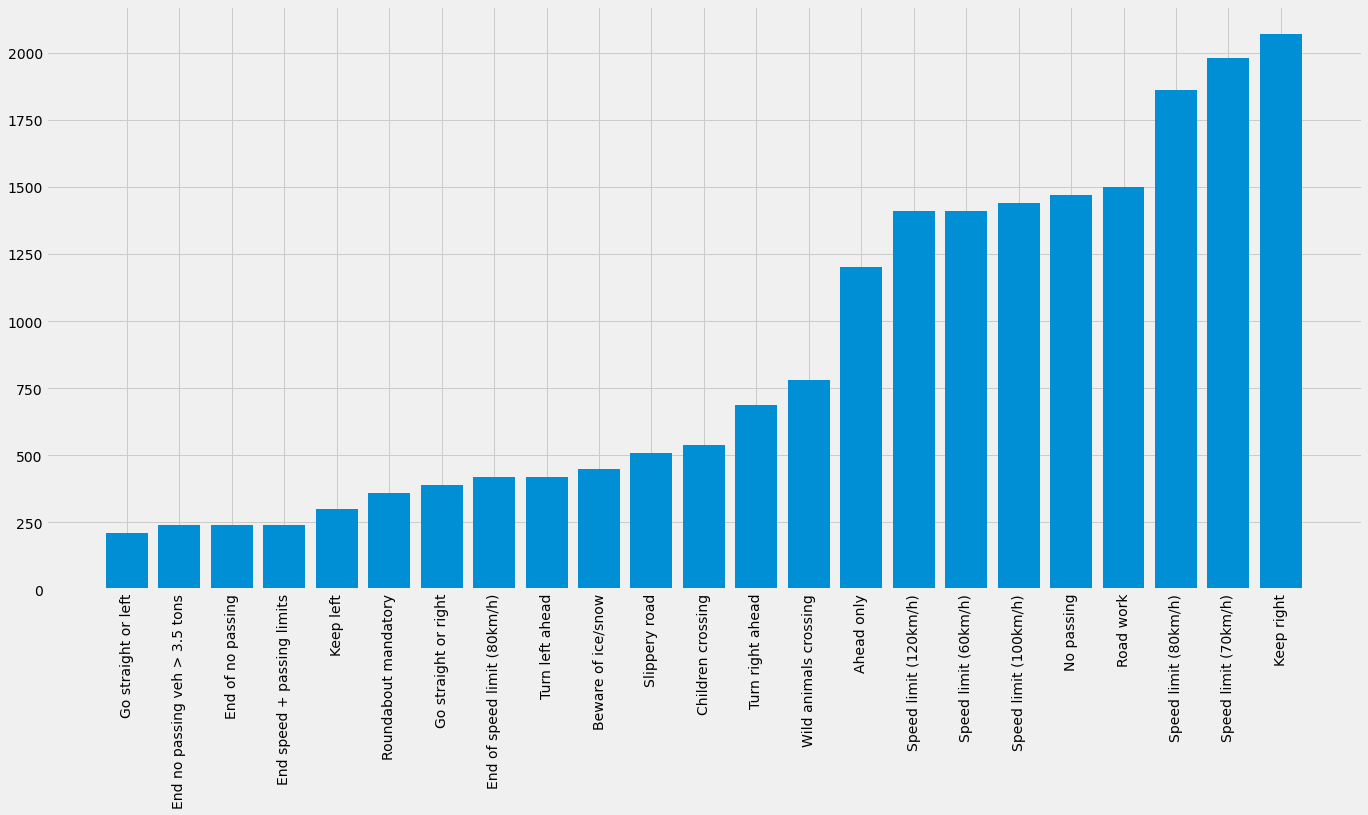

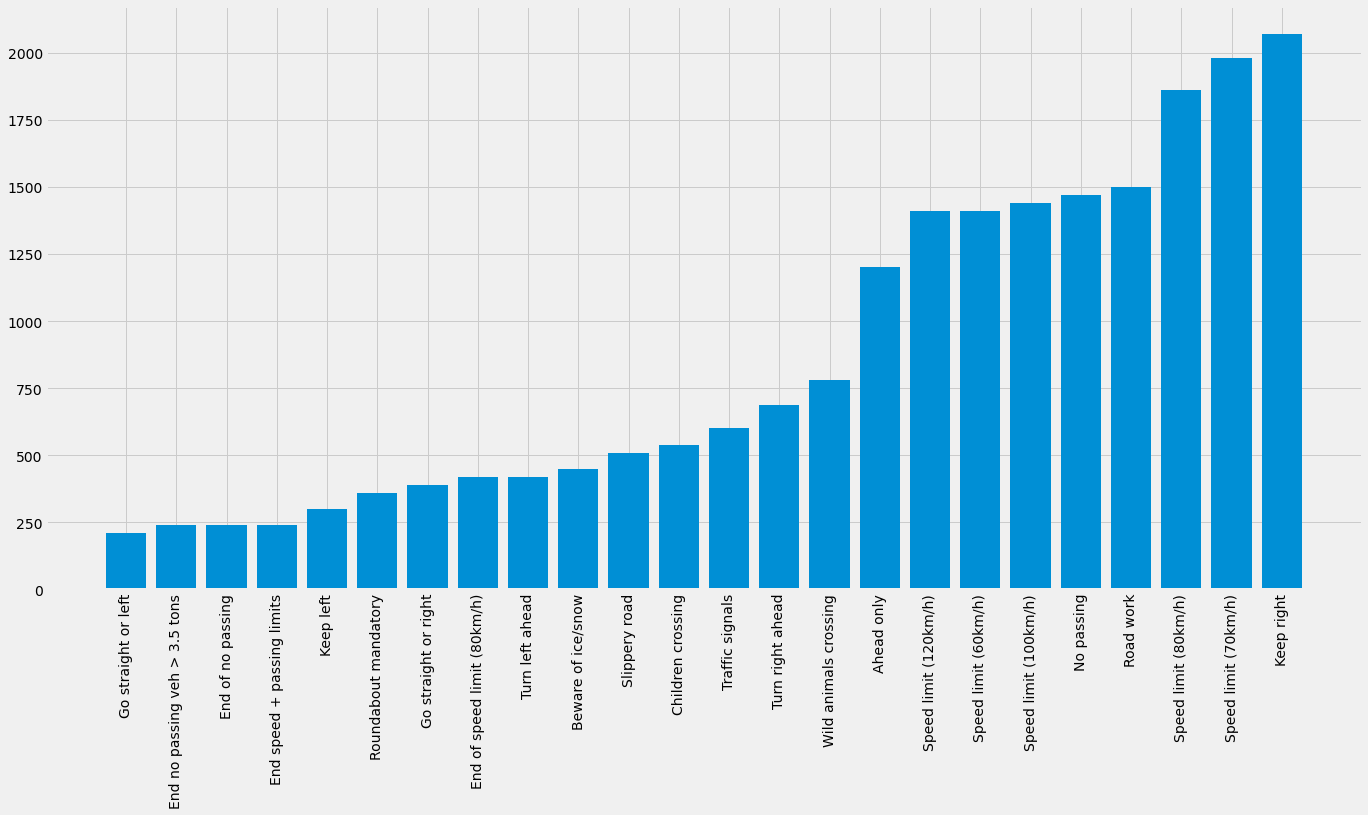

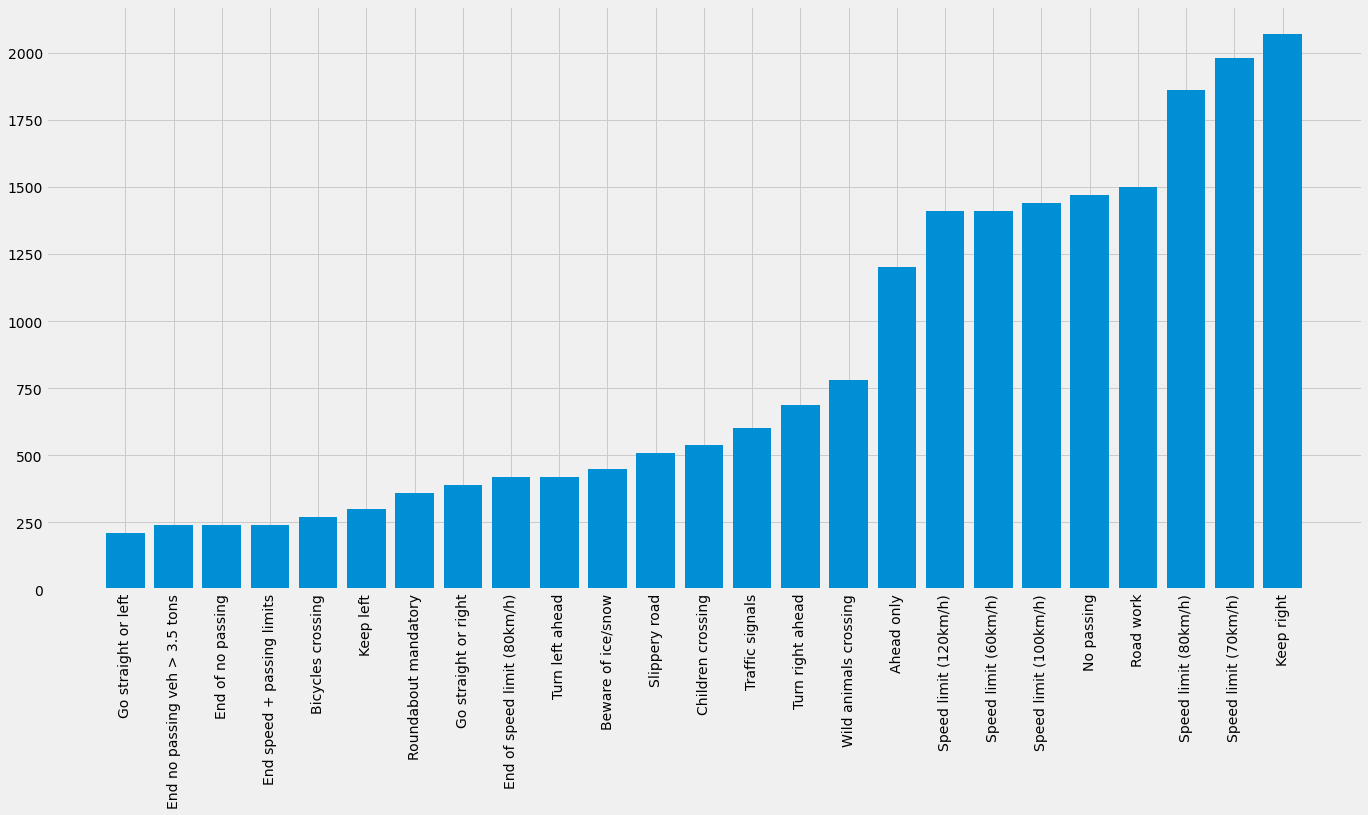

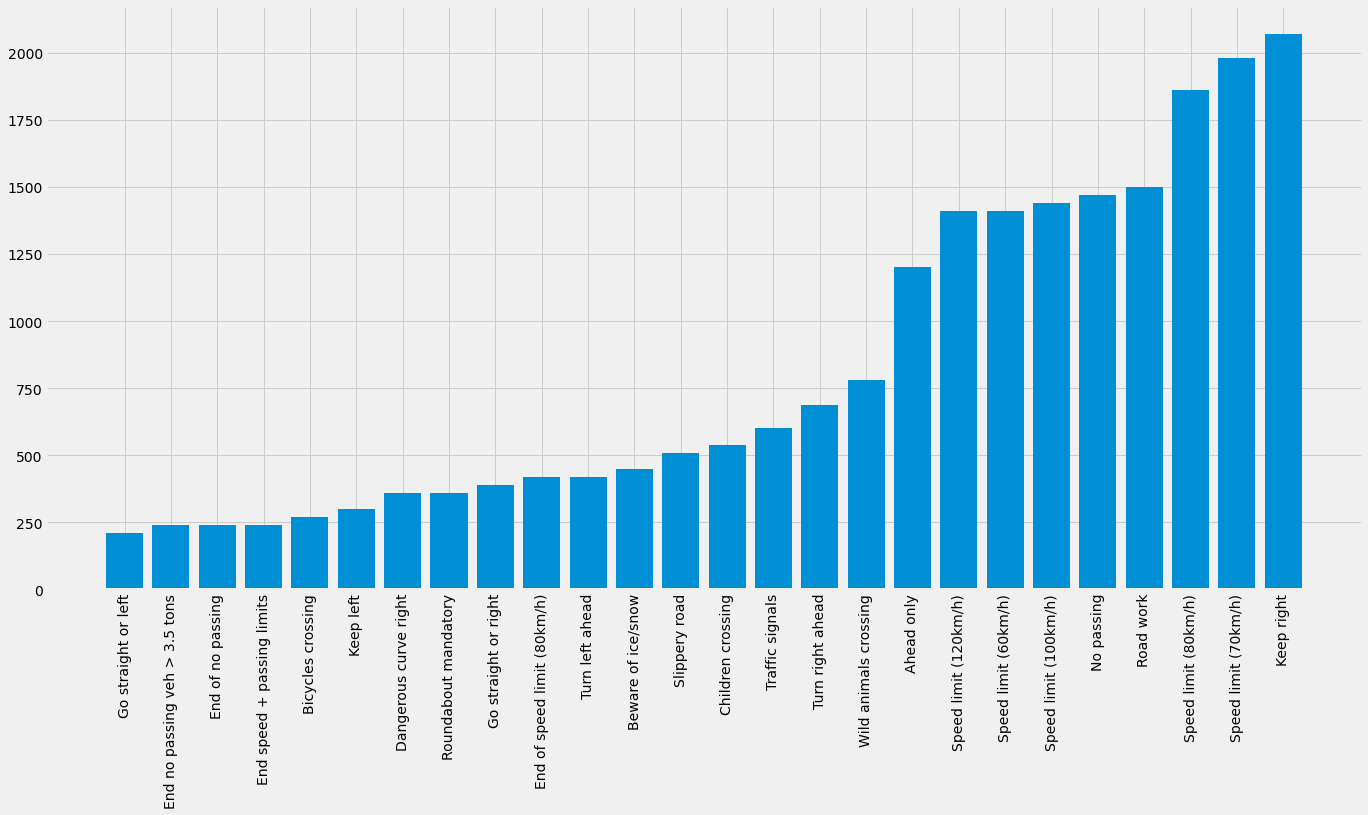

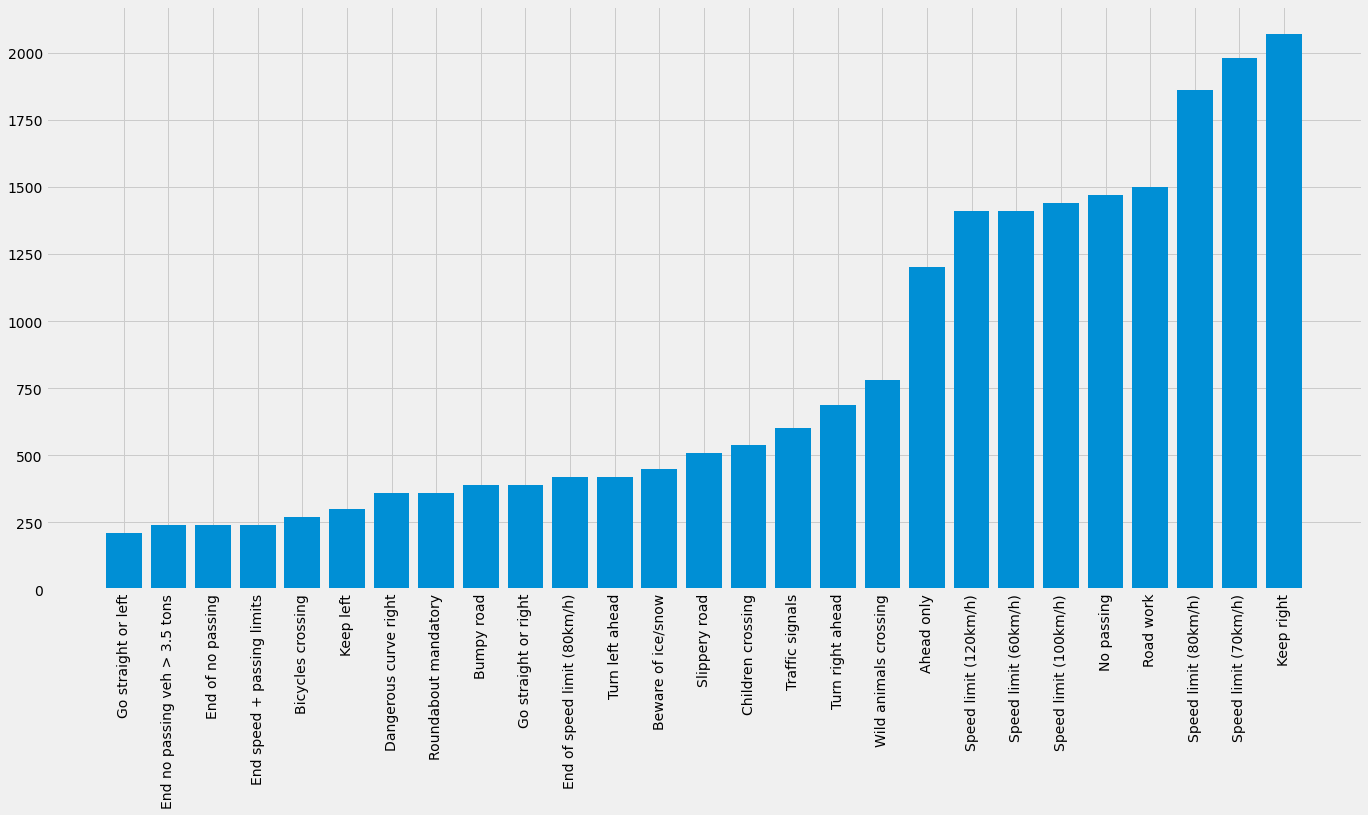

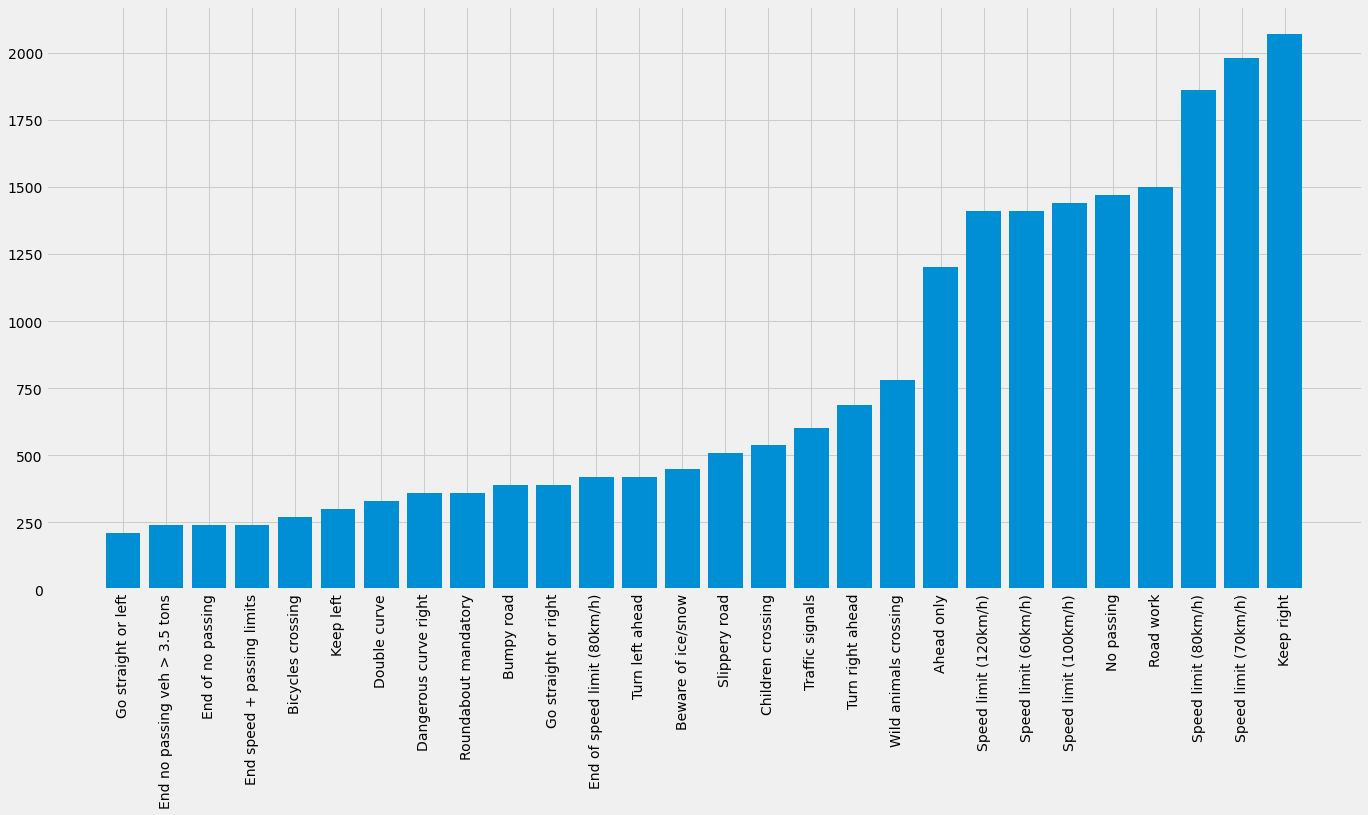

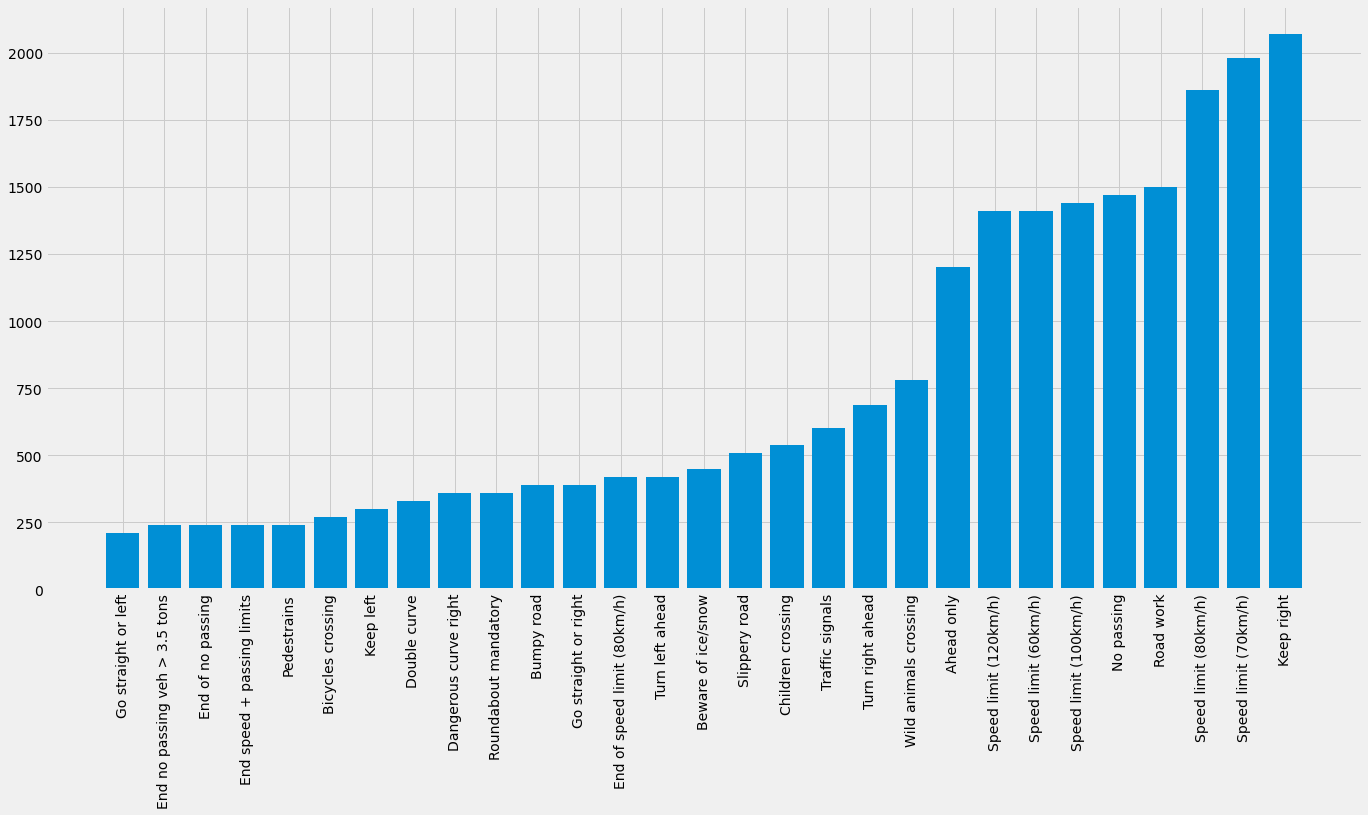

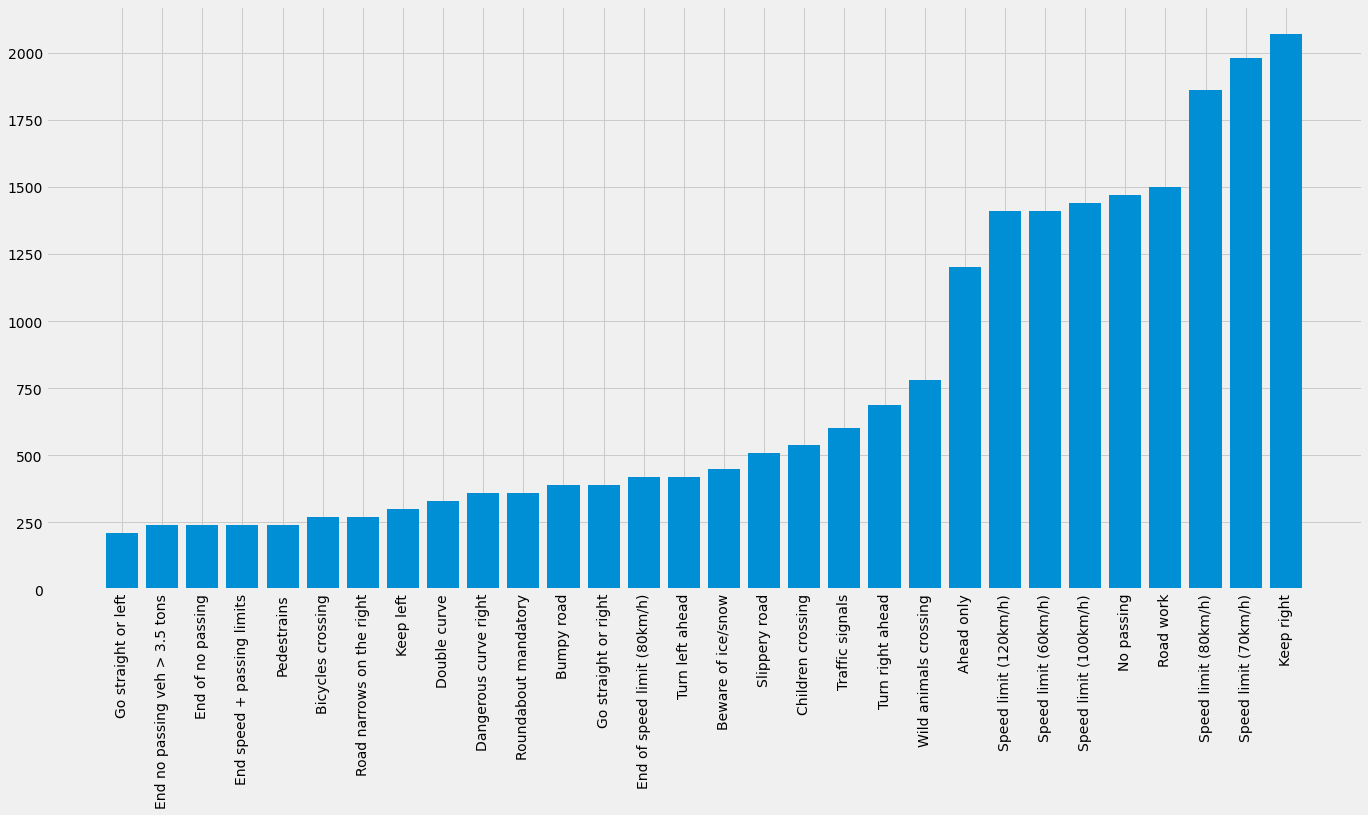

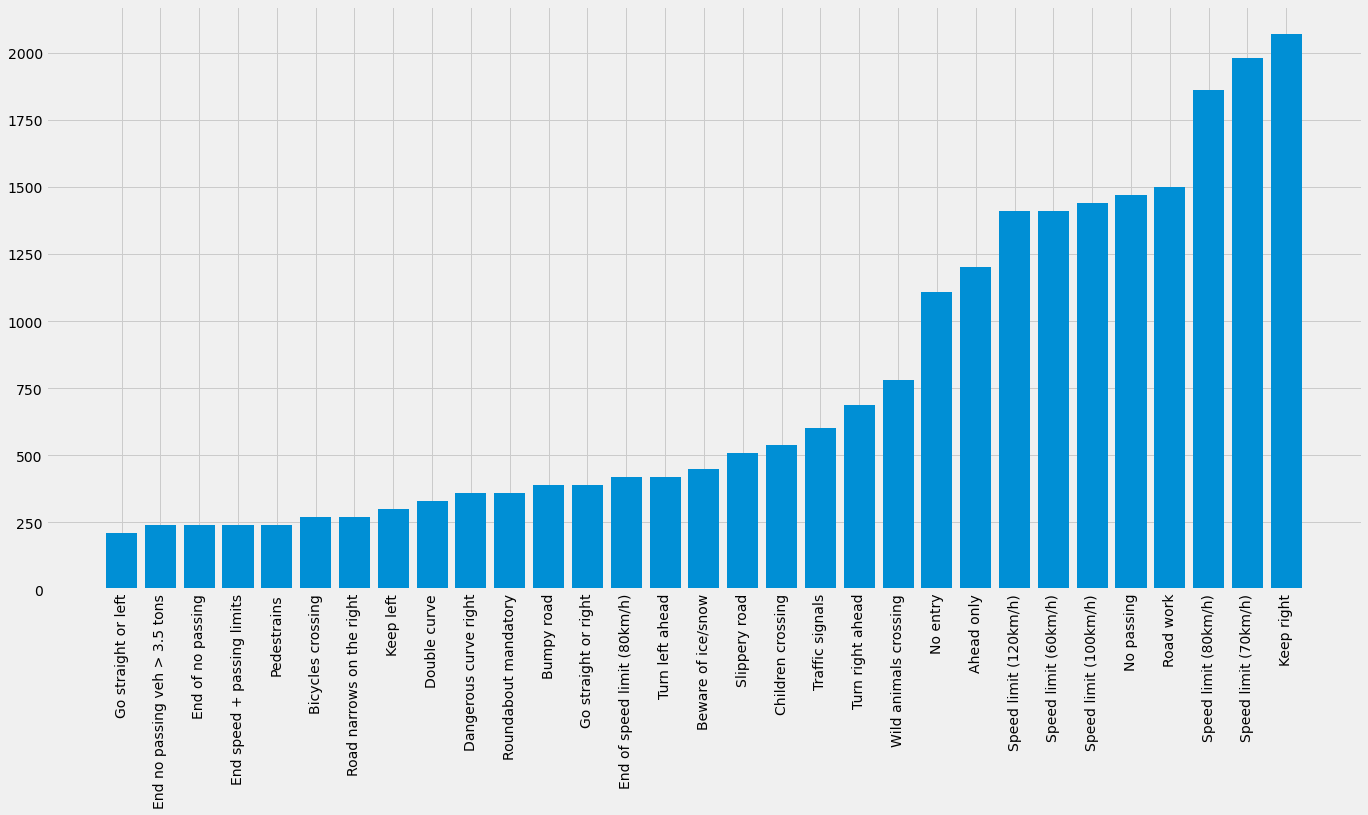

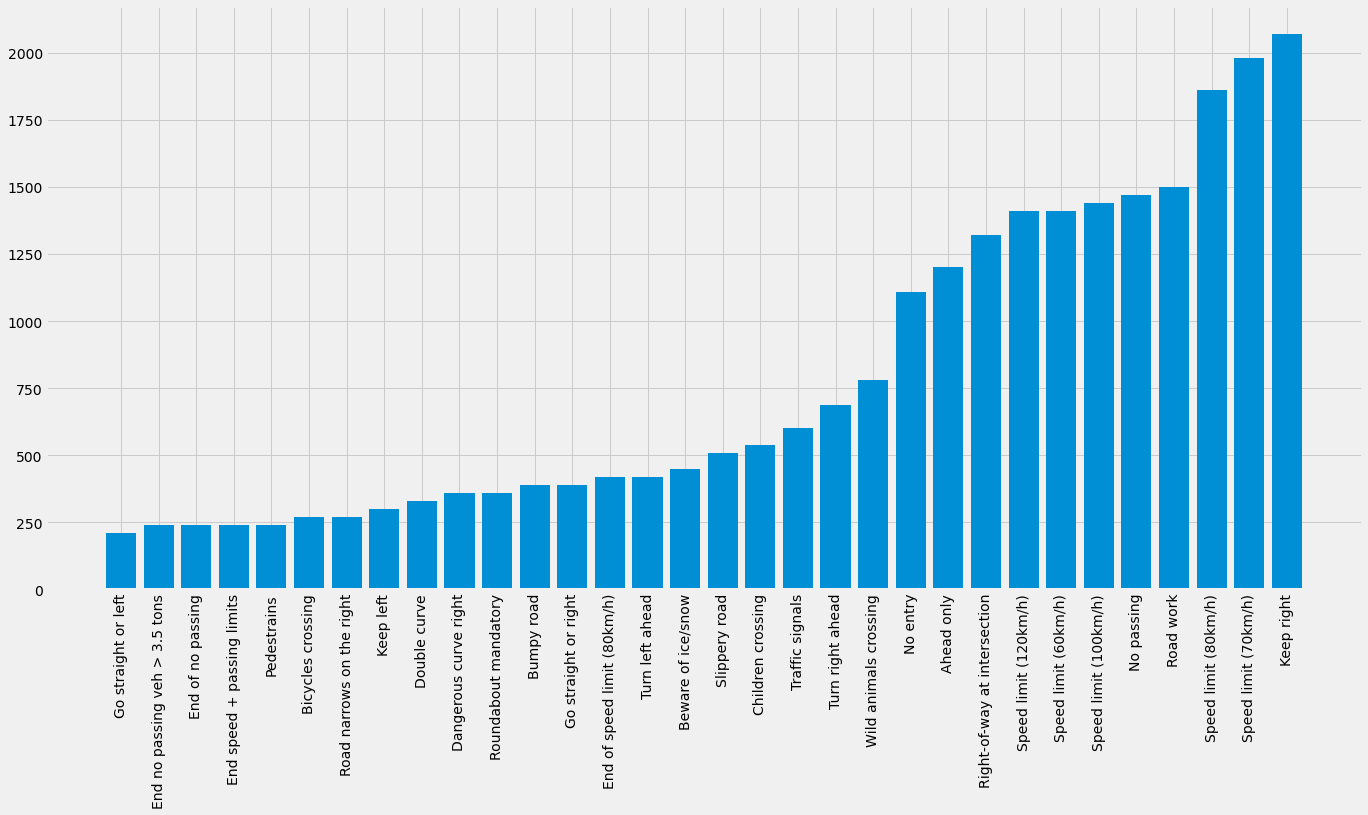

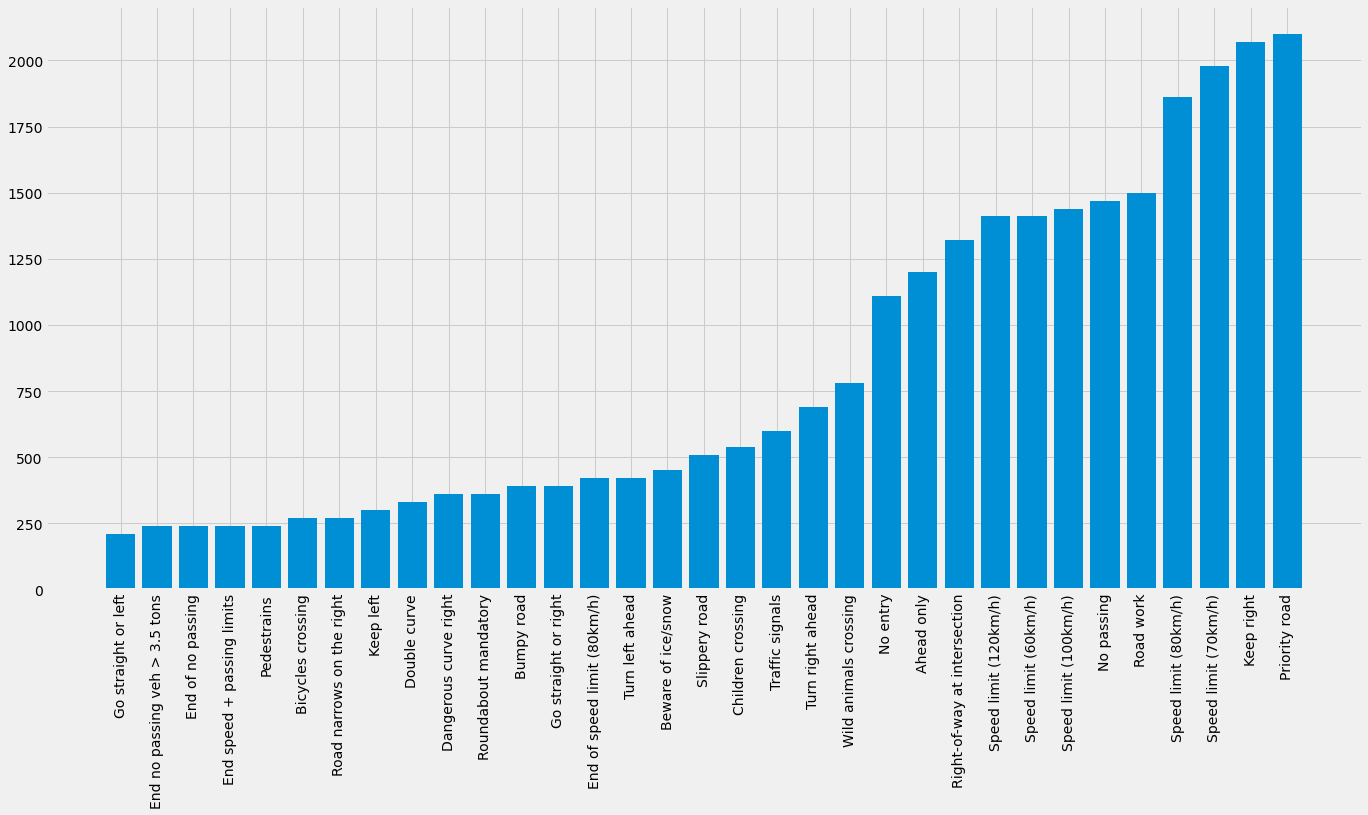

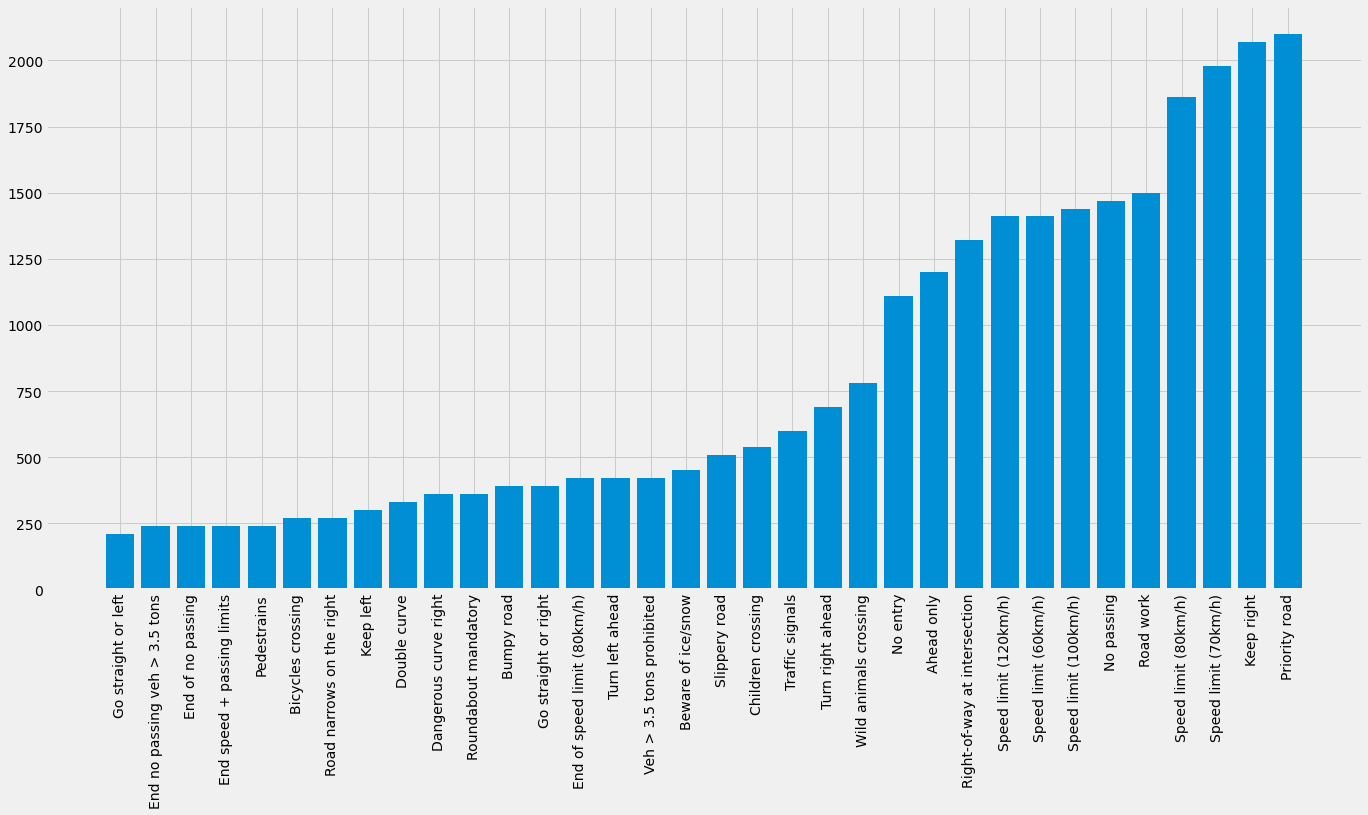

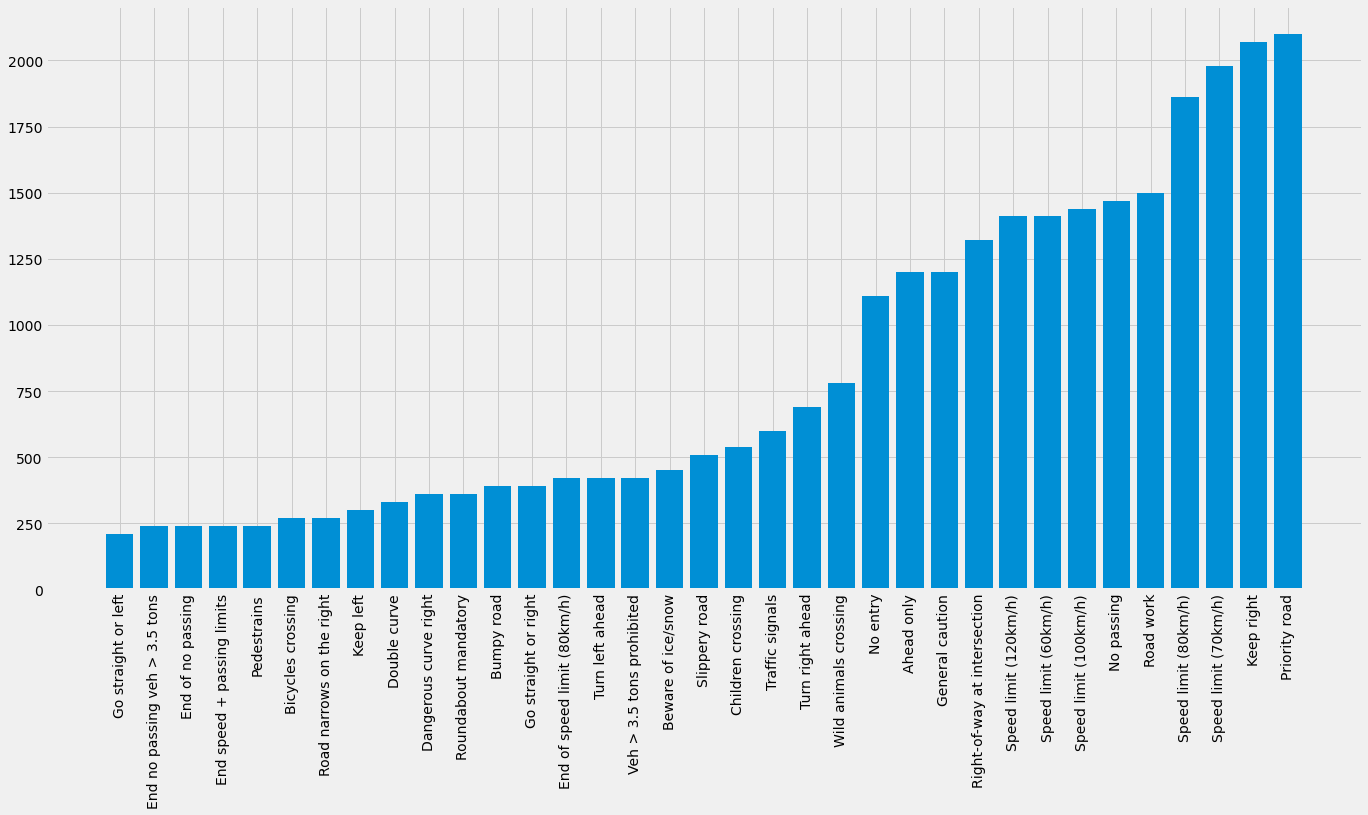

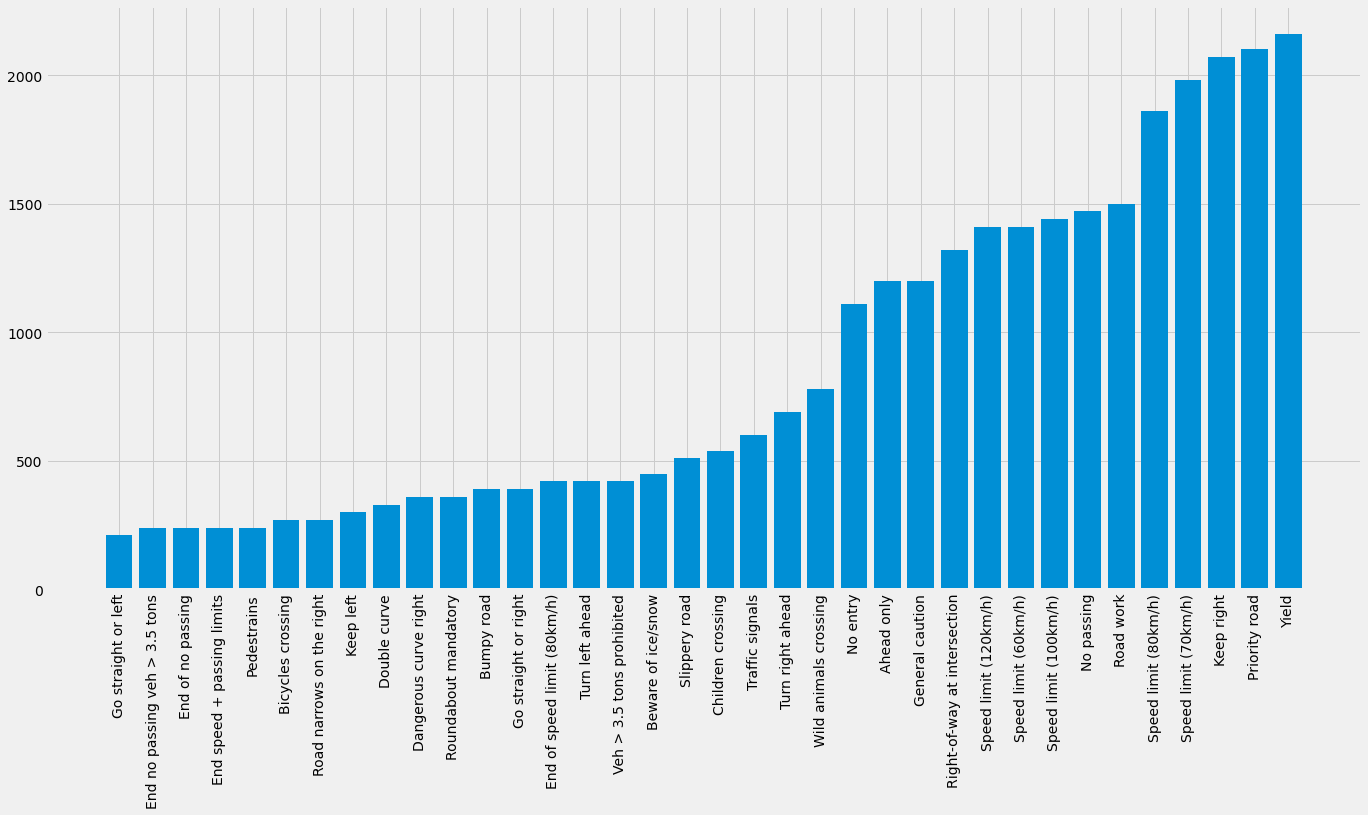

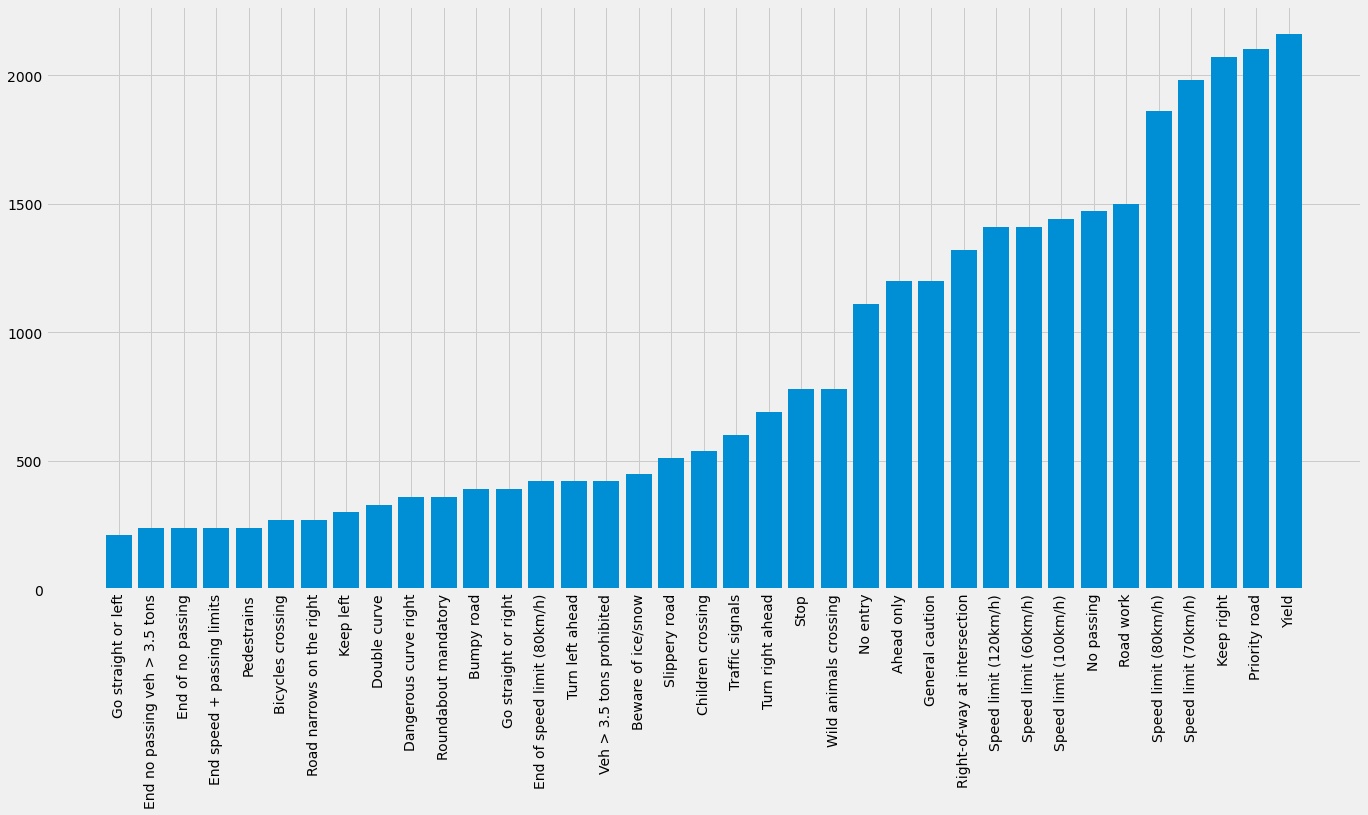

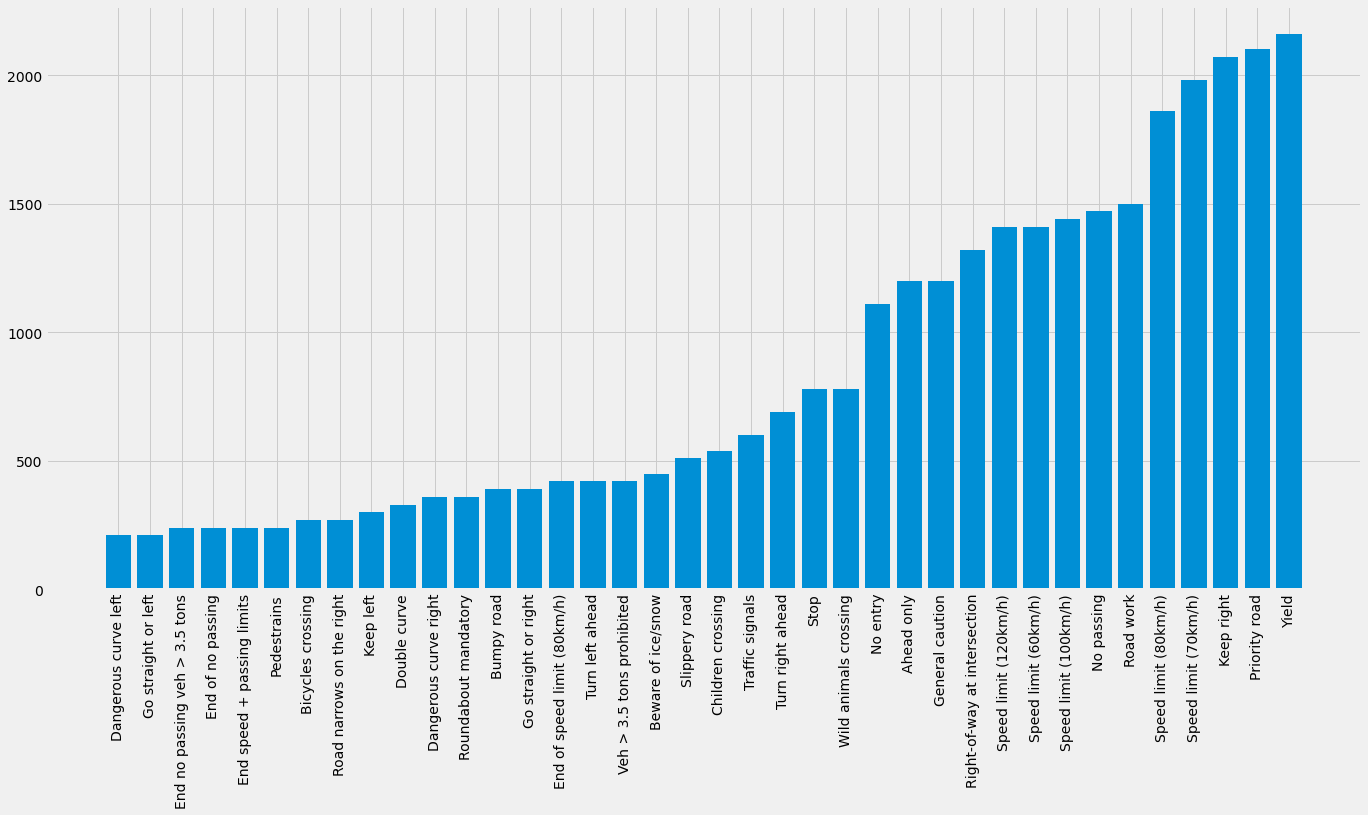

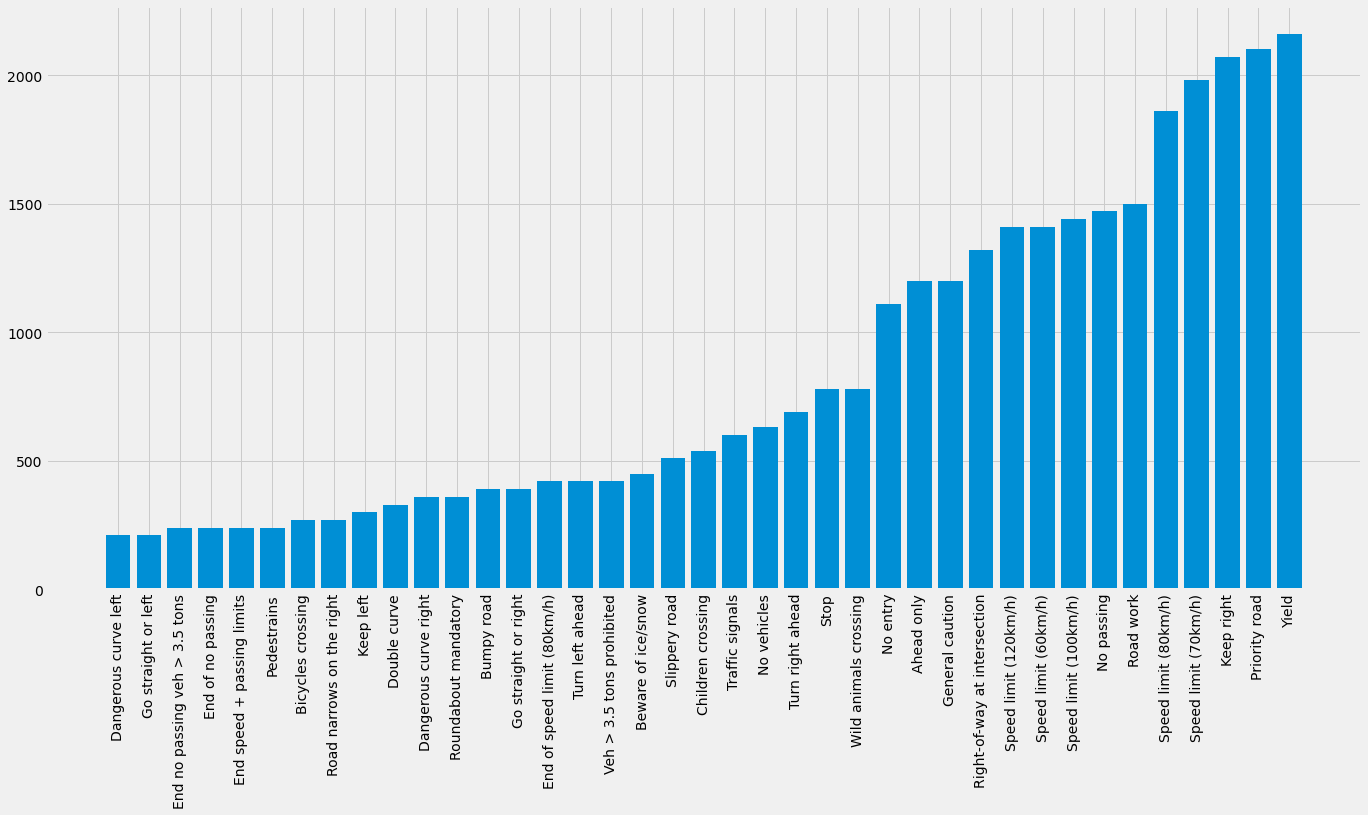

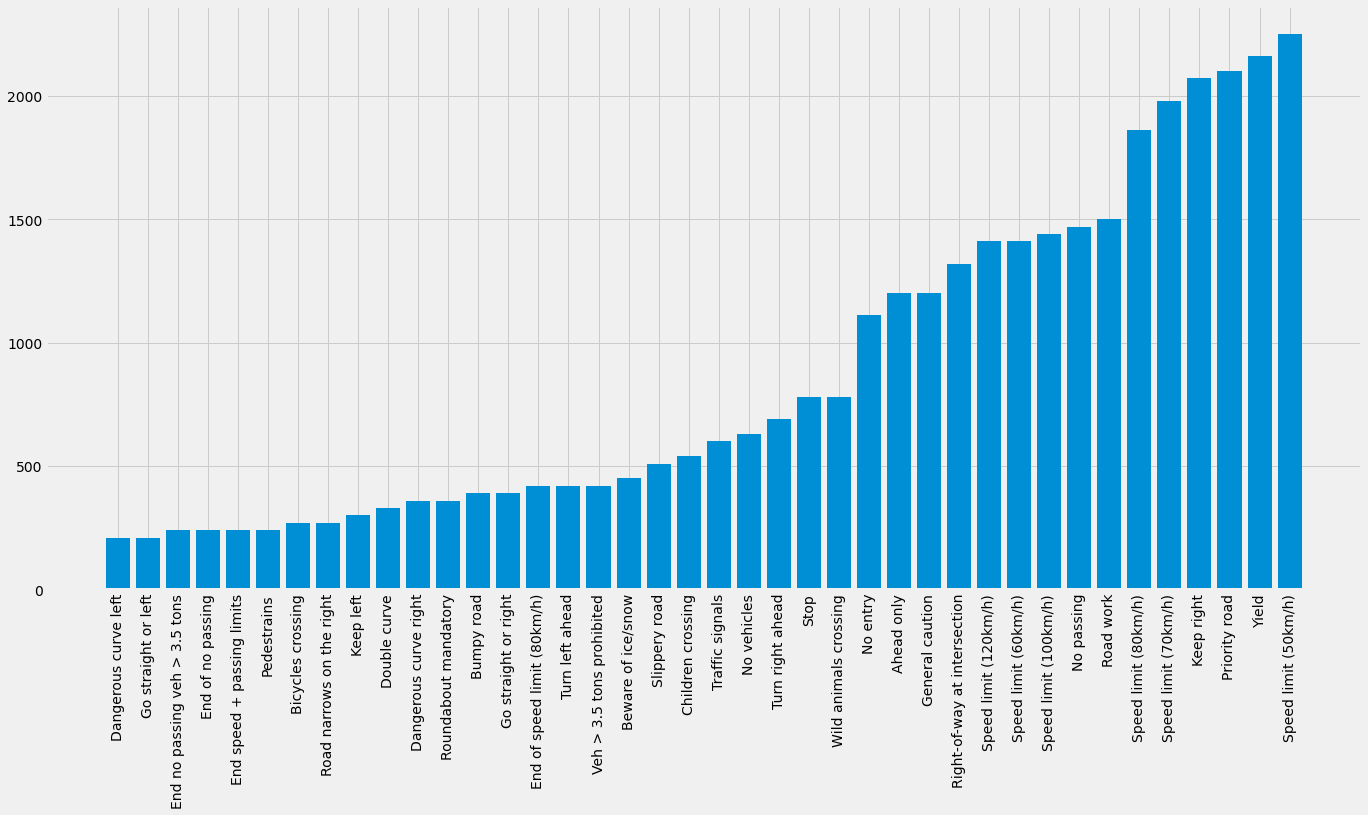

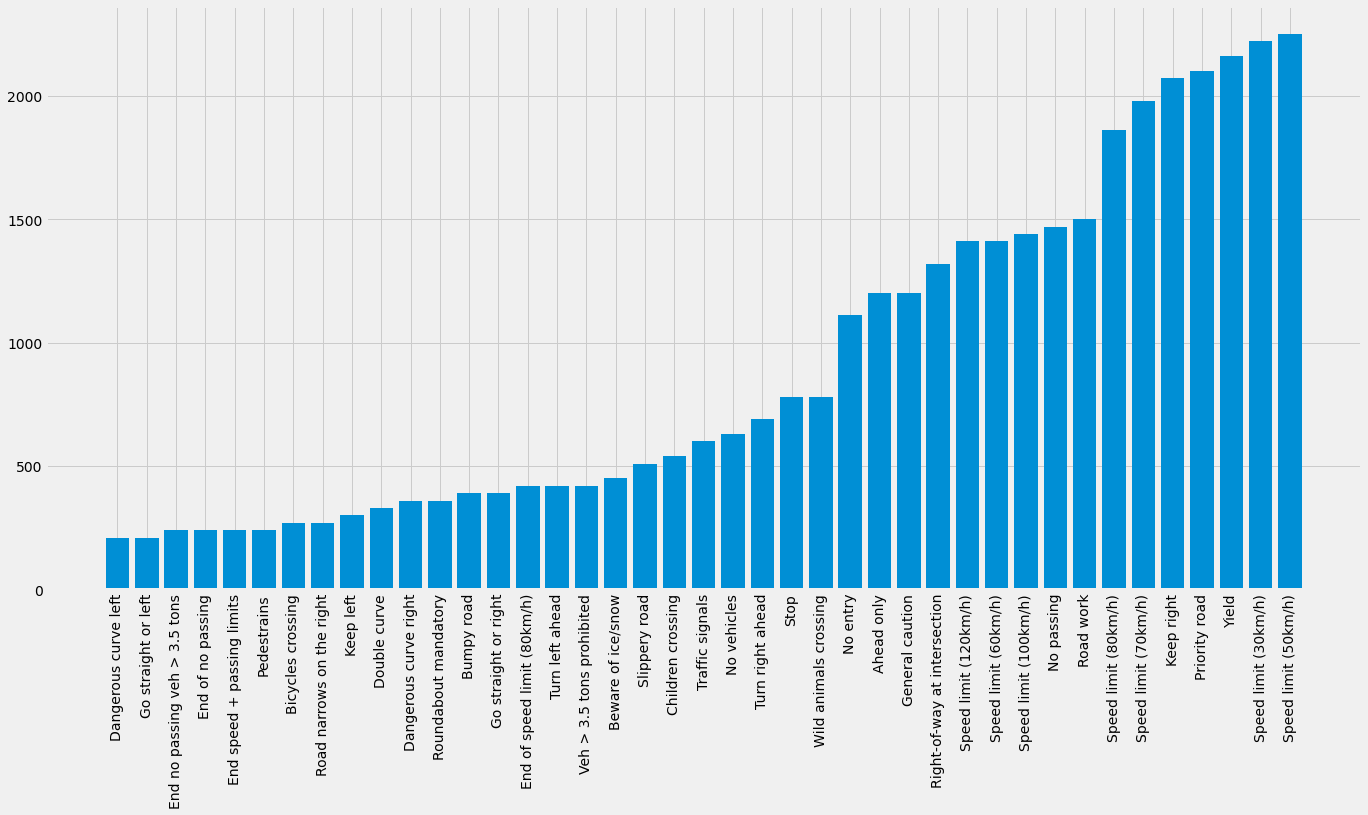

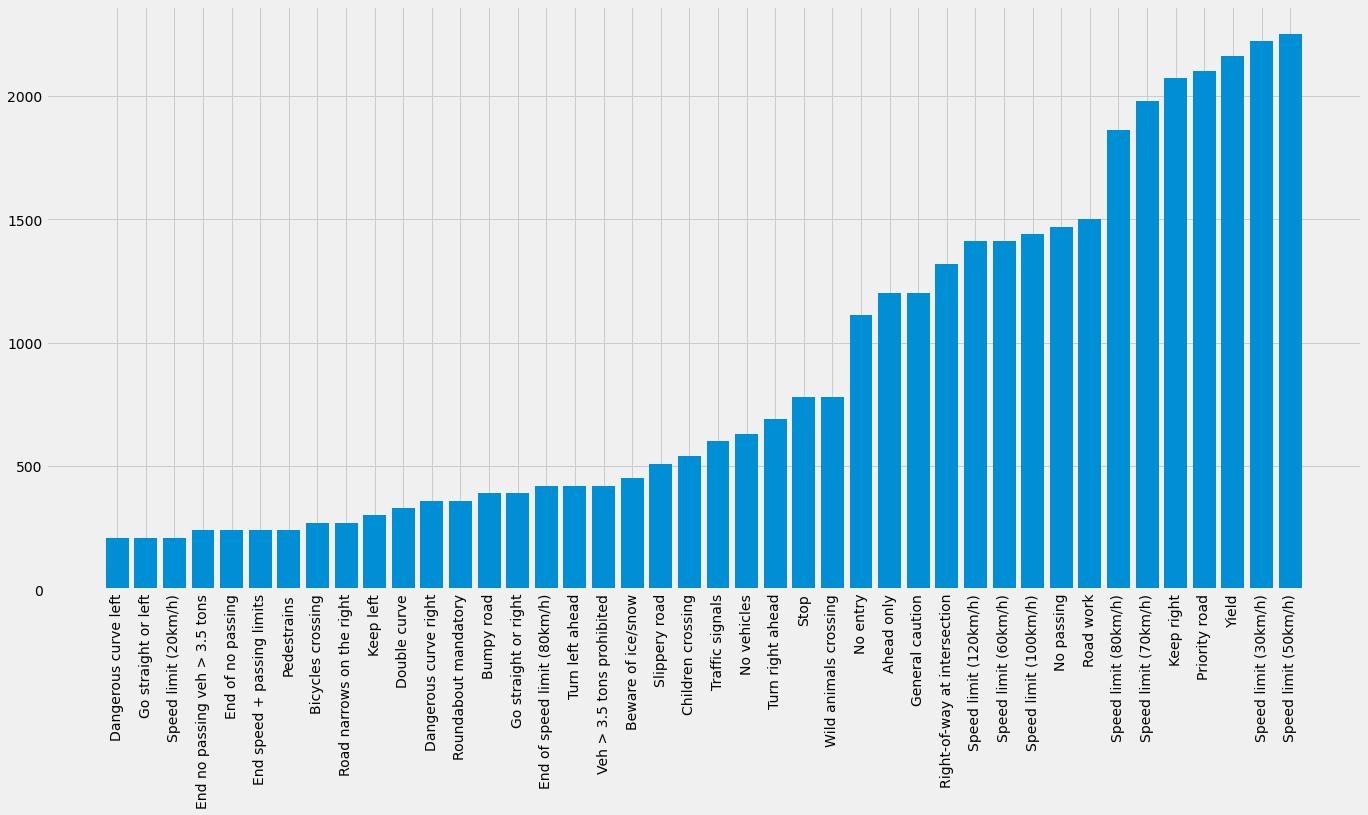

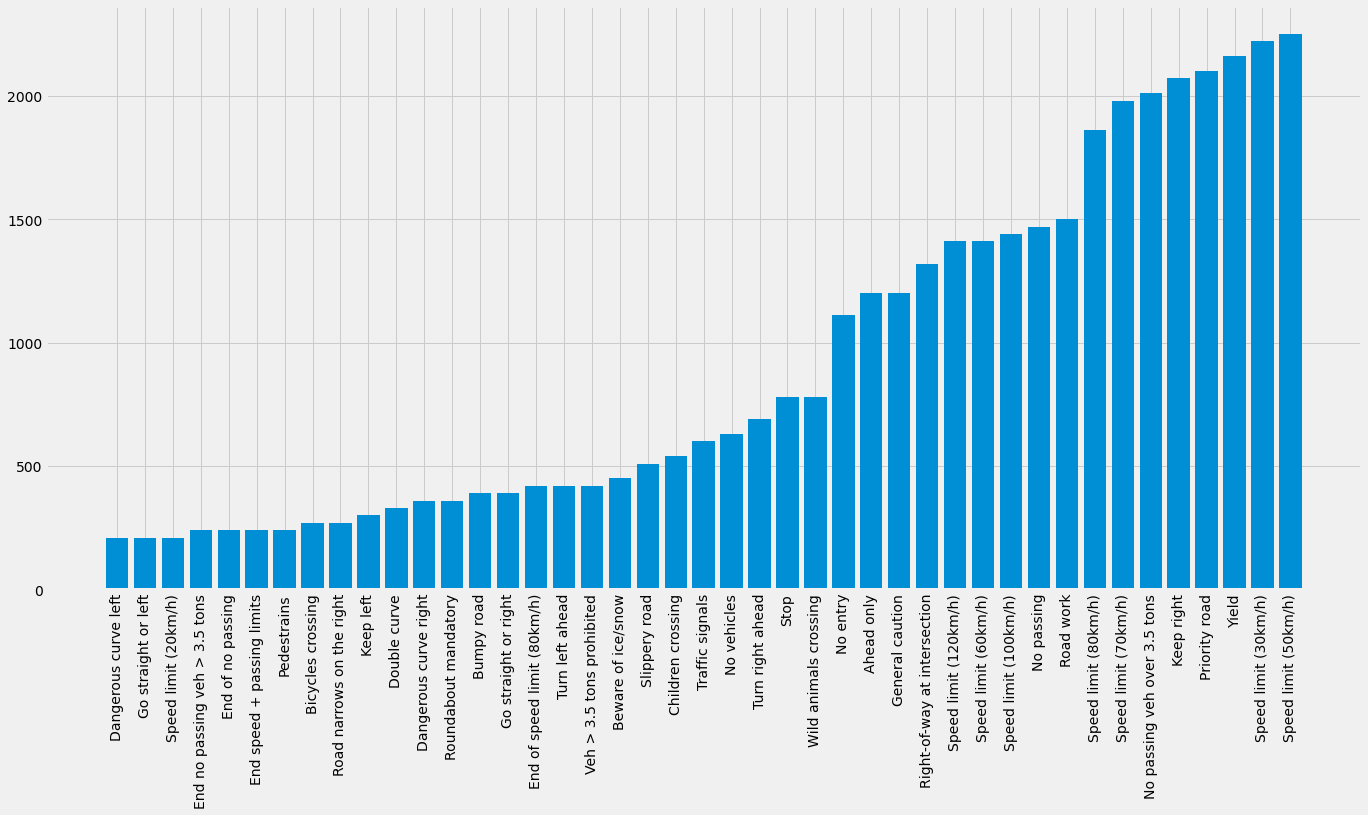

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
  train_files = os.listdir(train_path + '/' + folder)
  train_number.append(len(train_files))
  class_num.append(classes[int(folder)])

  zipped_lists = zip(train_number, class_num)
  sorted_pairs = sorted(zipped_lists)
  tuples = zip(*sorted_pairs)
  train_number, class_num = [list(tuple) for tuple in tuples]

  plt.figure(figsize=(21,10))
  plt.bar(class_num, train_number)
  plt.xticks(class_num, rotation='vertical')
  plt.show()
  

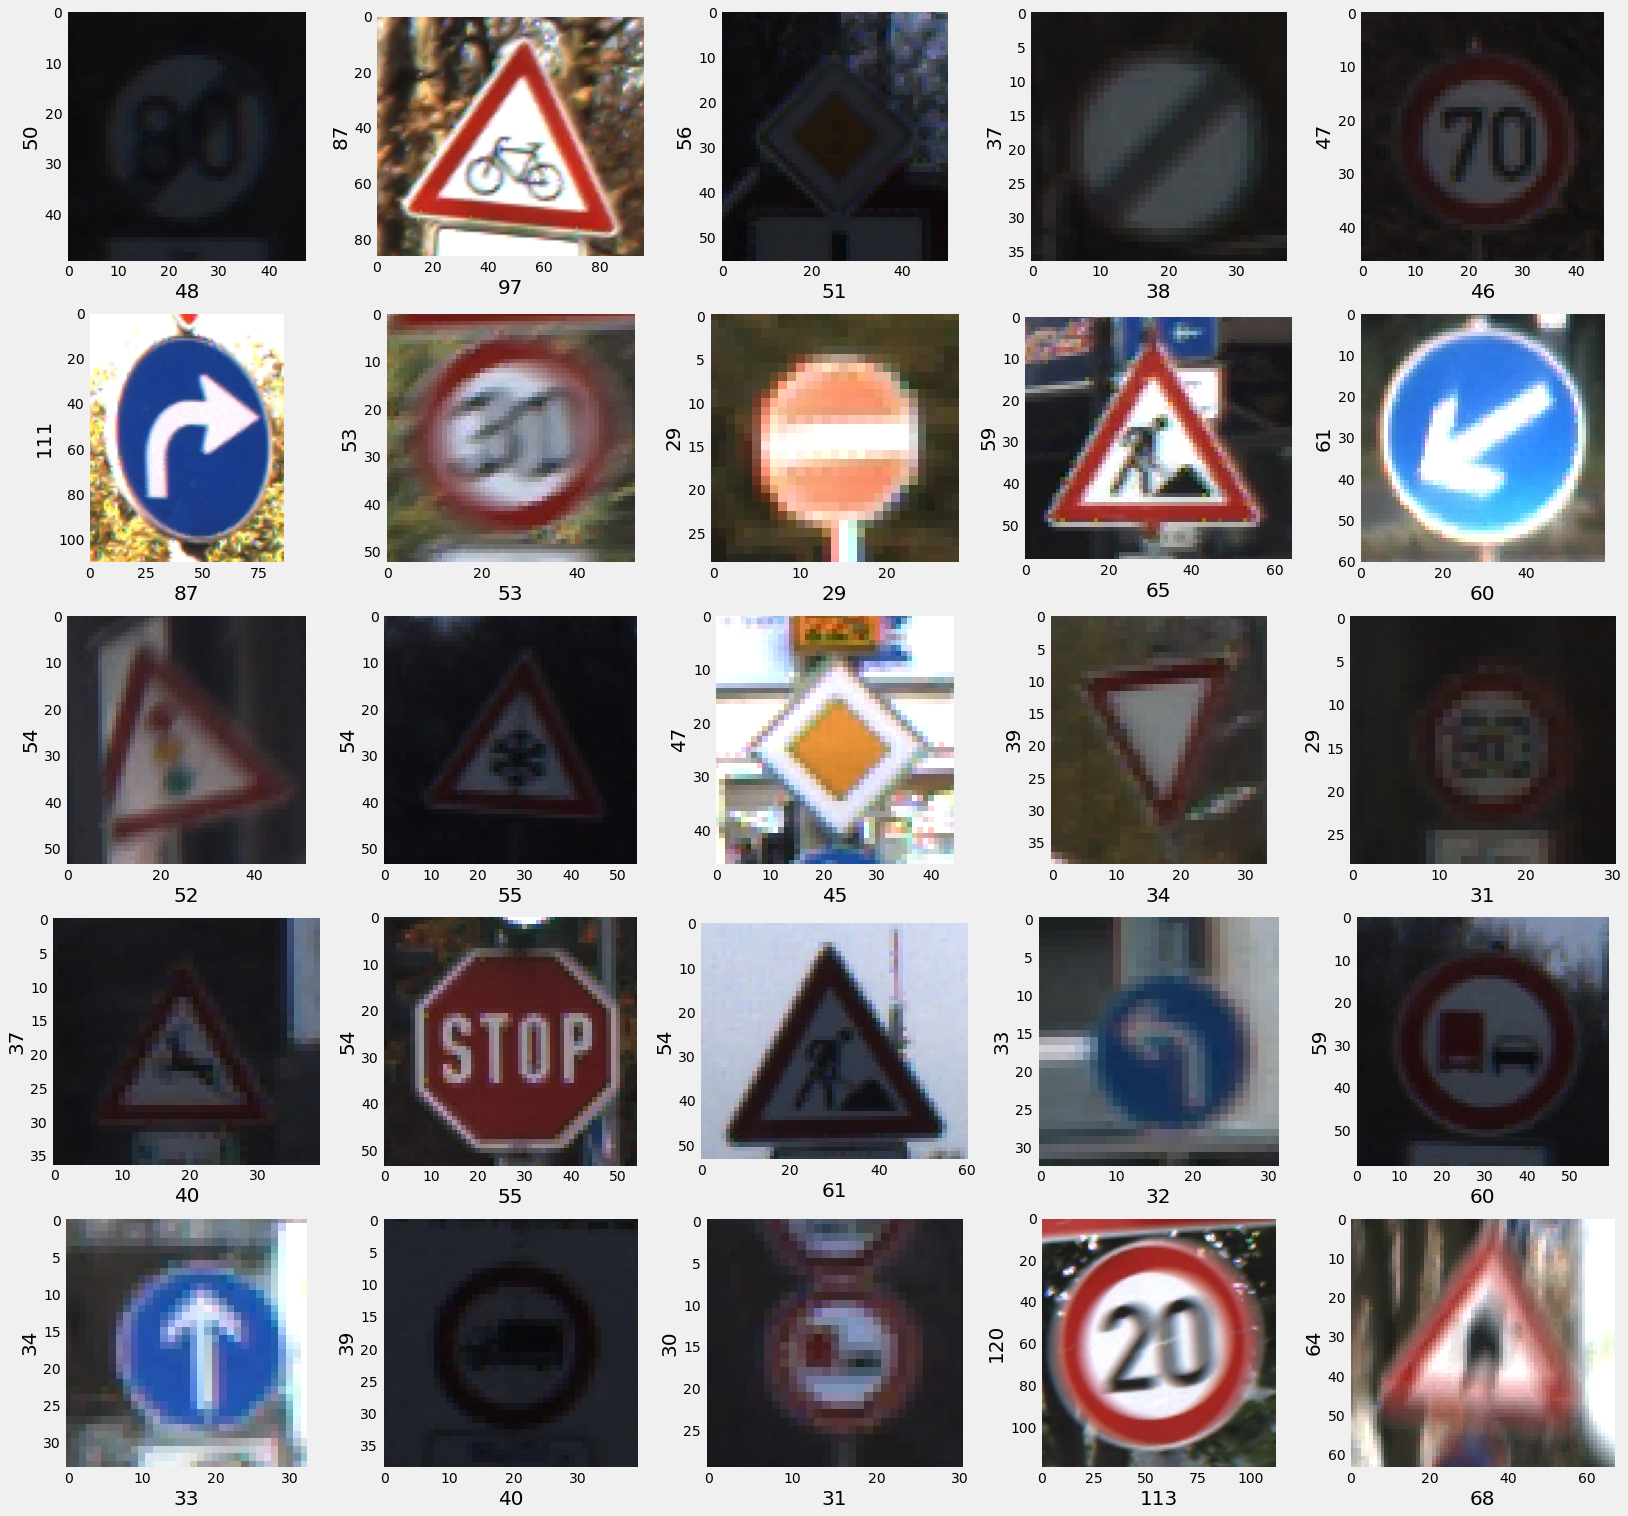

In [ ]:
import random
from matplotlib.image import imread

test= pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
  plt.subplot(5,5,i)
  random_img_path = data_dir + '/' + random.choice(imgs)
  rand_img = imread(random_img_path)
  plt.imshow(rand_img)
  plt.grid(b=None)
  plt.xlabel(rand_img.shape[1], fontsize = 20)
  plt.ylabel(rand_img.shape[0], fontsize = 20)

In [ ]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
  path = data_dir + '/Train/' + str(i)
  images = os.listdir(path)

  for img in images:
    try:
      image = cv2.imread(path + '/' + img)
      image_fromarray = Image.fromarray(image, 'RGB')
      resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
      image_data.append(np.array(resize_image))
      image_labels.append(i)
    except:
        print("Error in " + img)

image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)
X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_train.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_train.shape (11763,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape =(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Permute((2, 3, 1)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Permute((3, 1, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation = 'softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
lr = 0.001
epochs = 30

opt = Adam(lr= lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 109s 128ms/step - loss: 1.0933 - acc: 0.7028 - val_loss: 0.1077 - val_acc: 0.9651
Epoch 2/30
858/858 [==============================] - 107s 125ms/step - loss: 0.1999 - acc: 0.9392 - val_loss: 0.0267 - val_acc: 0.9921
Epoch 3/30
858/858 [==============================] - 107s 125ms/step - loss: 0.1072 - acc: 0.9678 - val_loss: 0.0366 - val_acc: 0.9878
Epoch 4/30
858/858 [==============================] - 107s 125ms/step - loss: 0.0847 - acc: 0.9739 - val_loss: 0.0494 - val_acc: 0.9848
Epoch 5/30
858/858 [==============================] - 107s 125ms/step - loss: 0.0745 - acc: 0.9764 - val_loss: 0.0188 - val_acc: 0.9946
Epoch 6/30
858/858 [==============================] - 107s 125ms/step - loss: 0.0620 - acc: 0.9808 - val_loss: 0.0180 - val_acc: 0.9946
Epoch 7/30
858/858 [==============================] - 107s 125ms/step - loss: 0.0490 - acc: 0.9854 - val_loss: 0.0078 - val_acc: 0.9983
Epoch 8/30
858/858 [============================

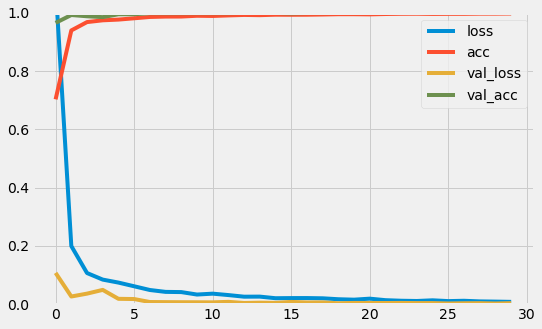

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
  try:
    image = cv2.imread(data_dir + '/' + img)
    imge_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
    data.append(np.array(resize_image))
  except:
    print("Error in" + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  0.7125890736342043


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.00      0.00      0.00       720
           2       0.00      0.00      0.00       750
           3       0.00      0.00      0.00       450
           4       0.00      0.00      0.00       660
           5       0.00      0.00      0.00       630
           6       0.00      0.00      0.00       150
           7       0.00      0.00      0.00       450
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00       480
          10       0.00      0.00      0.00       660
          11       0.00      0.00      0.00       420
          12       0.00      0.00      0.00       690
          13       0.00      0.00      0.00       720
          14       0.00      0.00      0.00       270
          15       0.00      0.00      0.00       210
          16       0.00      0.00      0.00       150
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


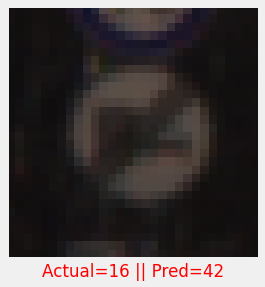

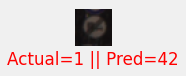

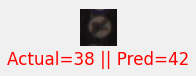

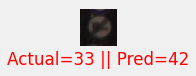

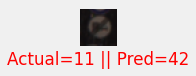

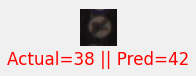

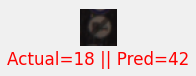

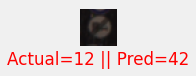

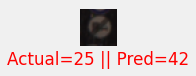

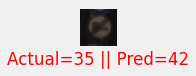

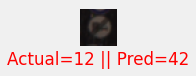

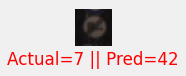

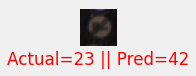

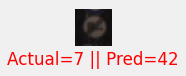

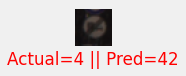

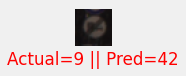

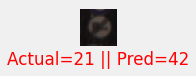

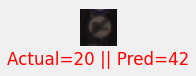

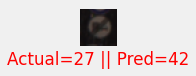

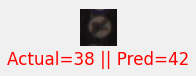

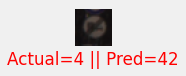

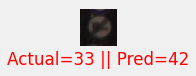

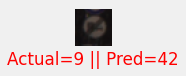

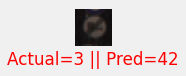

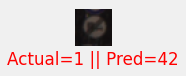

In [ ]:
plt.figure(figsize = (25,25))

start_index = 0
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  prediction = pred[start_index + i]
  actual = labels[start_index + i]
  col = 'g'
  if prediction != actual:
    col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
    plt.show()